<div class="alert alert-success h1" role="alert">
    <b> Introduction
</b>
<a class="anchor" id="intro"></a> </div>

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three
different cultivars. The analysis determined the quantities of 13 constituentsfound in each of the three types of wines. 
The attributes are: 	
1) Class identifier
2) Alcohol
3) Malic acid
4) Ash
5) Alcalinity of ash  
6) Magnesium
7) Total phenols
8) Flavanoids
9) Nonflavanoid phenols
10) Proanthocyanins
11) Color intensity
12) Hue
13) OD280/OD315 of diluted wines
14) Proline   

The data can be classified into 3 classes (Class 1, 2 and 3). The first column of data set is the class identifier.

In [1]:
#Data treatment
# ==============================================================================
import pandas as pd
import numpy as np

#Data visualization
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
#Preprocess and analysis
# ==============================================================================
import pingouin as pg
import statsmodels.api as sm
from scipy import stats

#Machine learning
# ==============================================================================
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,RobustScaler,OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
#Warnings
# ==============================================================================
import warnings
warnings.filterwarnings("ignore")

In [2]:
columns_names=['Class identifier','Alcohol','Malic acid','Ash', 'Alcalinity of ash ', 'Magnesium','Total phenols',' Flavanoids','Nonflavanoid phenols','Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines','Proline']
data=pd.read_csv('wineData.txt')
data.columns=columns_names
df=data.copy()

<div class="alert alert-success h1" role="alert">
    <b> Exploratory analysis
</b>
<a class="anchor" id="EDA"></a> </div>


In [3]:
df.sample(10)

Class identifier  Alcohol  Malic acid   Ash  Alcalinity of ash   \
86                  2    11.65        1.67  2.62                26.0   
140                 3    13.36        2.56  2.35                20.0   
147                 3    13.32        3.24  2.38                21.5   
26                  1    13.30        1.72  2.14                17.0   
56                  1    13.29        1.97  2.68                16.8   
124                 2    12.07        2.16  2.17                21.0   
146                 3    12.87        4.61  2.48                21.5   
38                  1    14.22        3.99  2.51                13.2   
69                  2    12.29        1.61  2.21                20.4   
27                  1    13.87        1.90  2.80                19.4   

     Magnesium  Total phenols   Flavanoids  Nonflavanoid phenols  \
86          88           1.92         1.61                  0.40   
140         89           1.40         0.50                  0.37   
147         92           1.93         0.76                  0.45   
26          94           2.40         2.19                  0.27   
56         102           3.00         3.23                  0.31   
124         85           2.60         2.65                  0.37   
146         86           1.70         0.65                  0.47   
38         128           3.00         3.04                  0.20   
69         103           1.10         1.02                  0.37   
27         107           2.95         2.97                  0.37   

     Proanthocyanins  Color intensity    Hue  OD280/OD315 of diluted wines  \
86              1.34             2.60  1.360                          3.21   
140             0.64             5.60  0.700                          2.47   
147             1.25             8.42  0.550                          1.62   
26              1.35             3.95  1.020                          2.77   
56              1.66             6.00  1.070                          2.84   
124             1.35             2.76  0.860                          3.28   
146             0.86             7.65  0.540                          1.86   
38              2.08             5.10  0.890                          3.53   
69              1.46             3.05  0.906                          1.82   
27              1.76             4.50  1.250                          3.40   

     Proline  
86       562  
140      780  
147      650  
26      1285  
56      1270  
124      378  
146      625  
38       760  
69       870  
27       915

In [4]:
df.rename(columns={'Class identifier': 'Class'}, inplace=True)
df

Class  Alcohol  Malic acid   Ash  Alcalinity of ash   Magnesium  \
0        1    13.20        1.78  2.14                11.2        100   
1        1    13.16        2.36  2.67                18.6        101   
2        1    14.37        1.95  2.50                16.8        113   
3        1    13.24        2.59  2.87                21.0        118   
4        1    14.20        1.76  2.45                15.2        112   
..     ...      ...         ...   ...                 ...        ...   
172      3    13.71        5.65  2.45                20.5         95   
173      3    13.40        3.91  2.48                23.0        102   
174      3    13.27        4.28  2.26                20.0        120   
175      3    13.17        2.59  2.37                20.0        120   
176      3    14.13        4.10  2.74                24.5         96   

     Total phenols   Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0             2.65         2.76                  0.26             1.28   
1             2.80         3.24                  0.30             2.81   
2             3.85         3.49                  0.24             2.18   
3             2.80         2.69                  0.39             1.82   
4             3.27         3.39                  0.34             1.97   
..             ...          ...                   ...              ...   
172           1.68         0.61                  0.52             1.06   
173           1.80         0.75                  0.43             1.41   
174           1.59         0.69                  0.43             1.35   
175           1.65         0.68                  0.53             1.46   
176           2.05         0.76                  0.56             1.35   

     Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0               4.38  1.05                          3.40     1050  
1               5.68  1.03                          3.17     1185  
2               7.80  0.86                          3.45     1480  
3               4.32  1.04                          2.93      735  
4               6.75  1.05                          2.85     1450  
..               ...   ...                           ...      ...  
172             7.70  0.64                          1.74      740  
173             7.30  0.70                          1.56      750  
174            10.20  0.59                          1.56      835  
175             9.30  0.60                          1.62      840  
176             9.20  0.61                          1.60      560  

[177 rows x 14 columns]

In [5]:
df.isnull().sum()

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
 Flavanoids                     0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         177 non-null    int64  
 1   Alcohol                       177 non-null    float64
 2   Malic acid                    177 non-null    float64
 3   Ash                           177 non-null    float64
 4   Alcalinity of ash             177 non-null    float64
 5   Magnesium                     177 non-null    int64  
 6   Total phenols                 177 non-null    float64
 7    Flavanoids                   177 non-null    float64
 8   Nonflavanoid phenols          177 non-null    float64
 9   Proanthocyanins               177 non-null    float64
 10  Color intensity               177 non-null    float64
 11  Hue                           177 non-null    float64
 12  OD280/OD315 of diluted wines  177 non-null    float64
 13  Proli

In [7]:
df.describe().T

count        mean         std     min     25%  \
Class                         177.0    1.943503    0.773991    1.00    1.00   
Alcohol                       177.0   12.993672    0.808808   11.03   12.36   
Malic acid                    177.0    2.339887    1.119314    0.74    1.60   
Ash                           177.0    2.366158    0.275080    1.36    2.21   
Alcalinity of ash             177.0   19.516949    3.336071   10.60   17.20   
Magnesium                     177.0   99.587571   14.174018   70.00   88.00   
Total phenols                 177.0    2.292260    0.626465    0.98    1.74   
 Flavanoids                   177.0    2.023446    0.998658    0.34    1.20   
Nonflavanoid phenols          177.0    0.362316    0.124653    0.13    0.27   
Proanthocyanins               177.0    1.586949    0.571545    0.41    1.25   
Color intensity               177.0    5.054802    2.324446    1.28    3.21   
Hue                           177.0    0.956983    0.229135    0.48    0.78   
OD280/OD315 of diluted wines  177.0    2.604294    0.705103    1.27    1.93   
Proline                       177.0  745.096045  314.884046  278.00  500.00   

                                 50%     75%      max  
Class                           2.00    3.00     3.00  
Alcohol                        13.05   13.67    14.83  
Malic acid                      1.87    3.10     5.80  
Ash                             2.36    2.56     3.23  
Alcalinity of ash              19.50   21.50    30.00  
Magnesium                      98.00  107.00   162.00  
Total phenols                   2.35    2.80     3.88  
 Flavanoids                     2.13    2.86     5.08  
Nonflavanoid phenols            0.34    0.44     0.66  
Proanthocyanins                 1.55    1.95     3.58  
Color intensity                 4.68    6.20    13.00  
Hue                             0.96    1.12     1.71  
OD280/OD315 of diluted wines    2.78    3.17     4.00  
Proline                       672.00  985.00  1680.00

In [8]:
# We definte the predictor variables, X and the target variable, y
X=df.drop(columns=['Class'], axis=1)
y=df['Class']

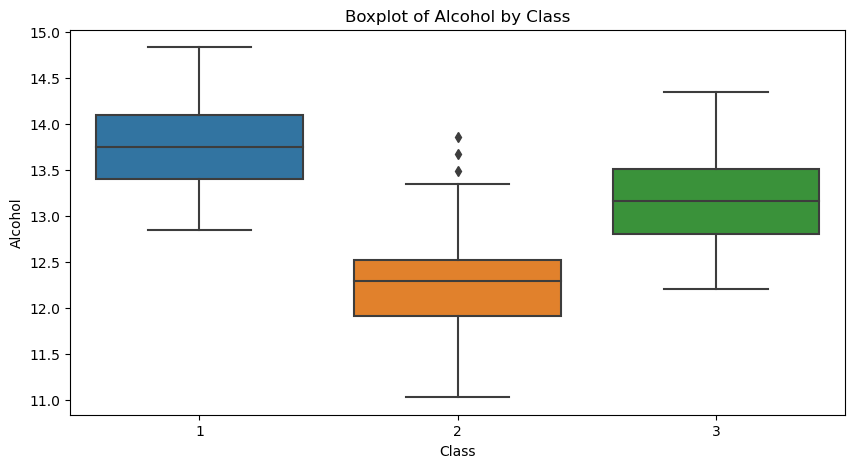

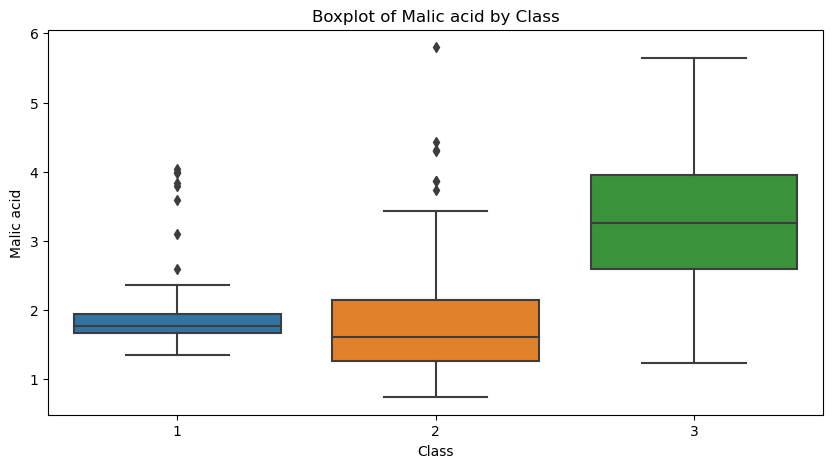

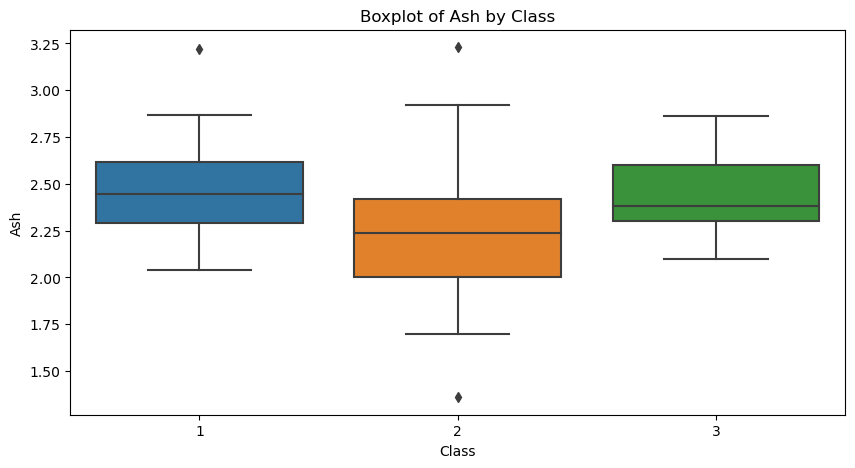

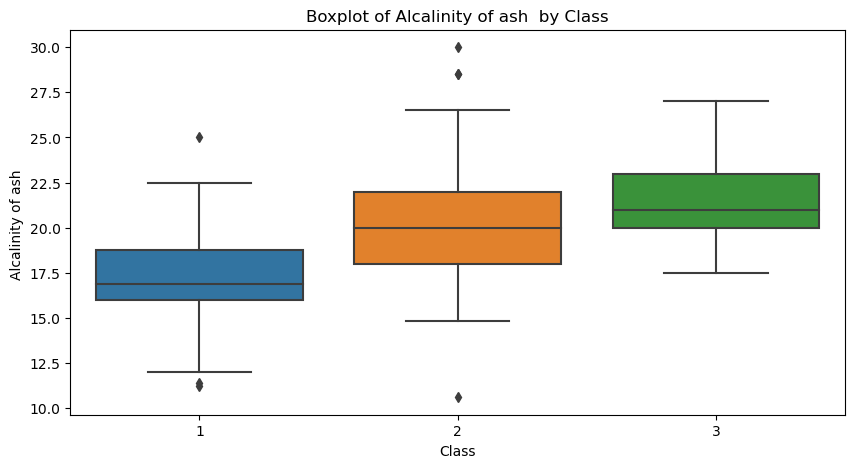

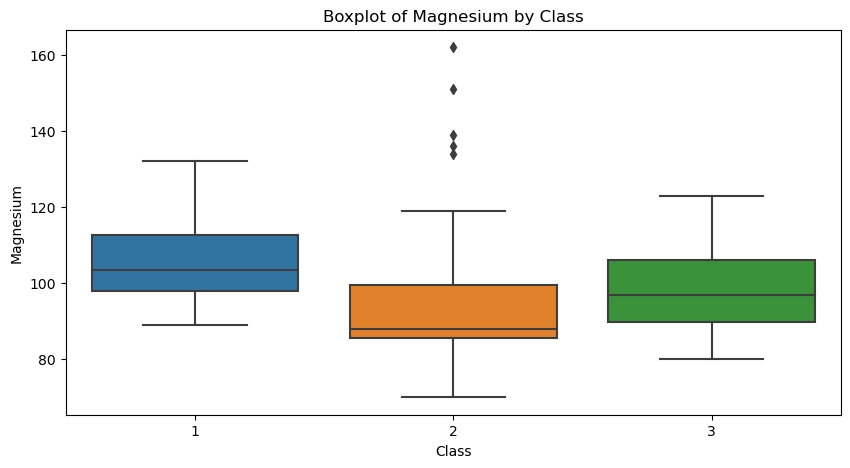

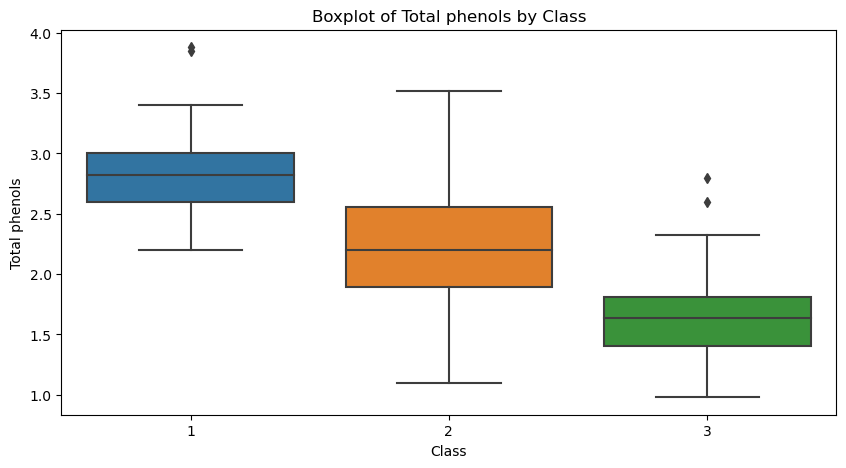

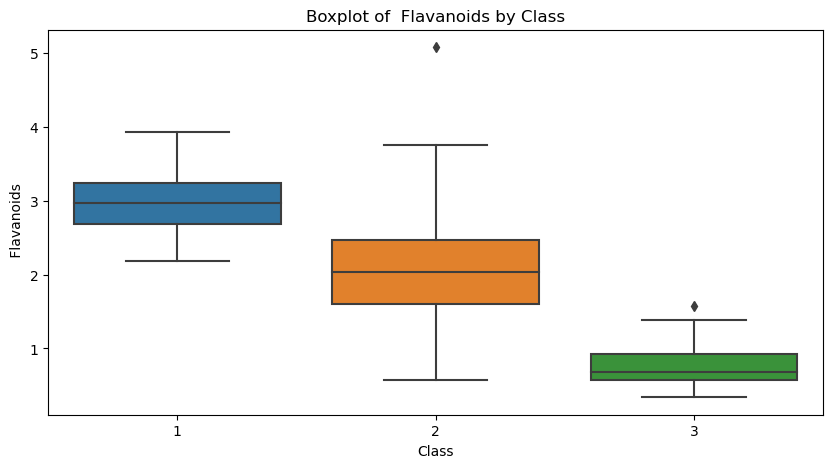

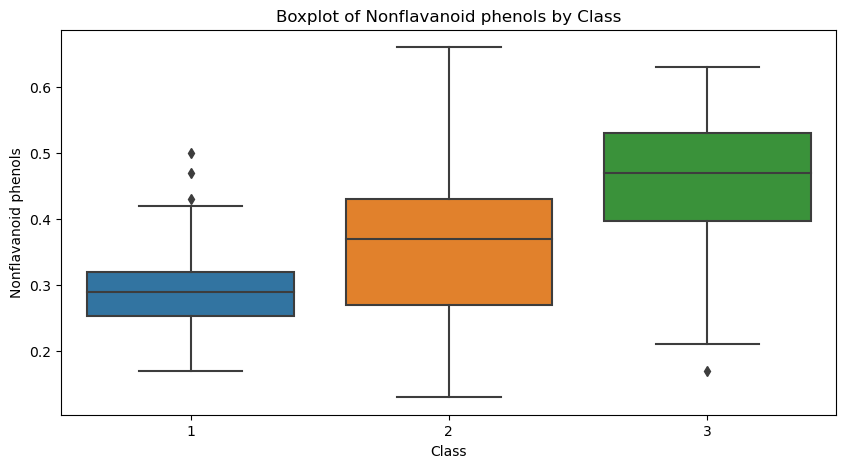

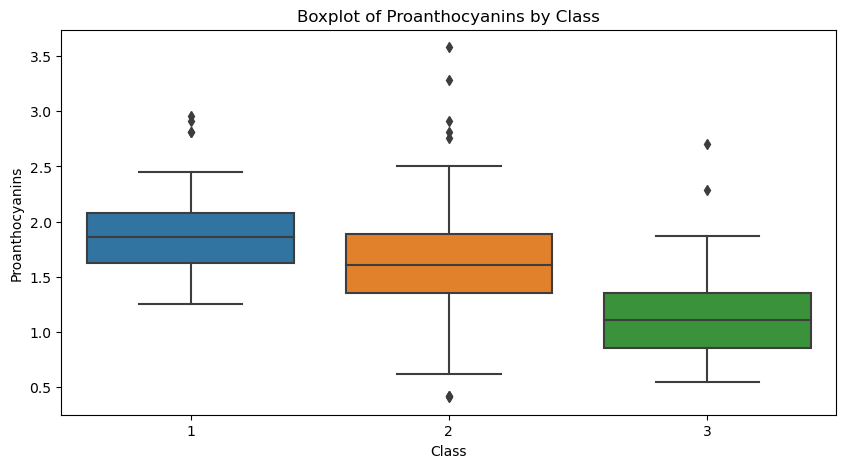

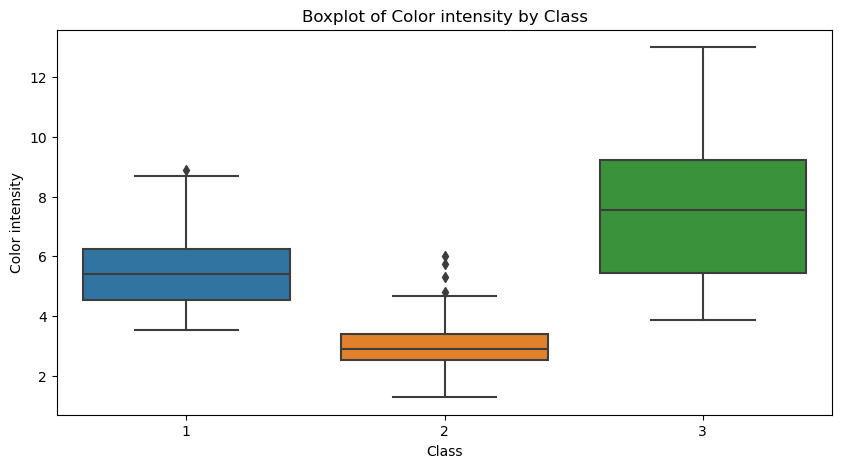

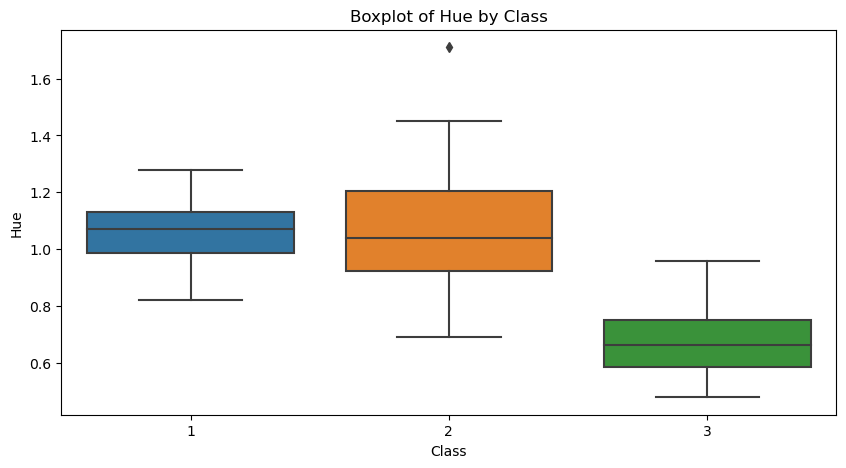

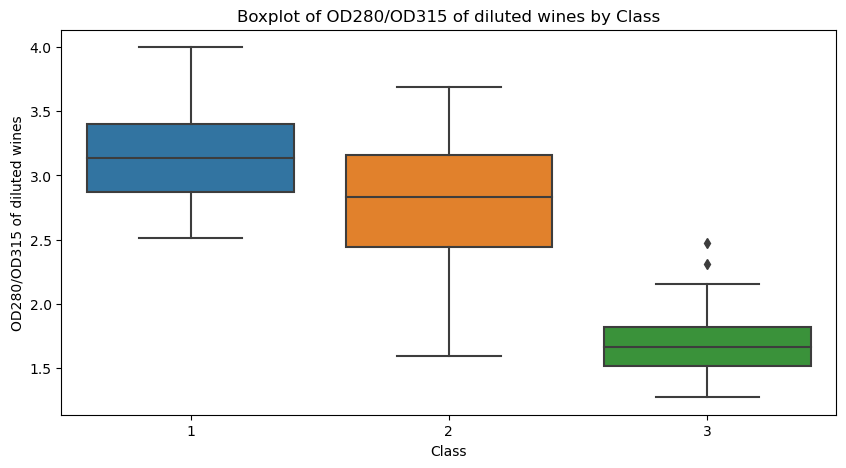

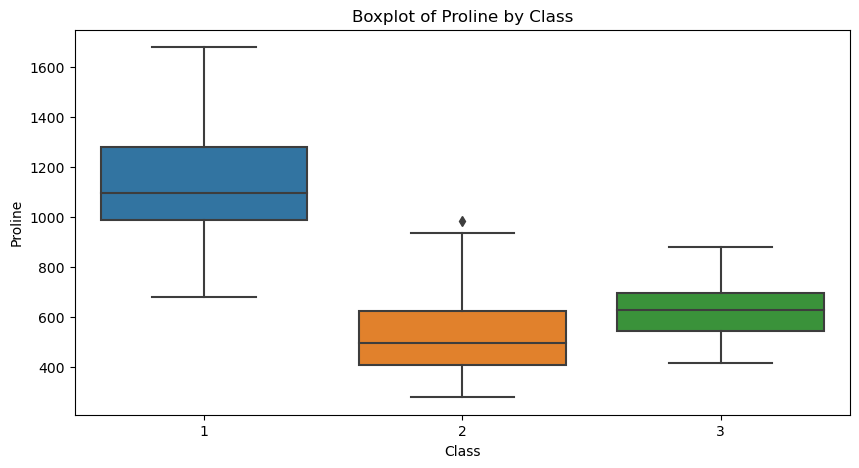

In [9]:
for col in X.columns:
    fig, (ax1) = plt.subplots(1, 1, figsize=(10, 5))
    sns.boxplot(data=df, x='Class', y=X[col], ax=ax1)
    ax1.set_title(f'Boxplot of {col} by Class')

We observe that all the features are different for each class. Hence, we conclude that all the variables will help us to predict the wine class. 

In [10]:
def plot_columns(df):
    if isinstance(df, pd.DataFrame):
        colors = sns.color_palette("husl", len(df.columns))
        for i, col in enumerate(df.columns):
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
            sns.boxplot(x=df[col], ax=ax1, color=colors[i])
            sns.histplot(df[col], bins=10, ax=ax2, color=colors[i])
            ax1.set_title(f'Boxplot of {col}', fontsize = 18, fontweight = "bold")
            ax1.set_xlabel(str(col),fontsize = 14, fontweight = "bold")
            ax2.set_xlabel(str(col),fontsize = 14, fontweight = "bold")
            ax2.set_ylabel('Frequency', fontsize = 14, fontweight = "bold")
            ax2.set_title(f'Density Plot of {col}', fontsize = 18, fontweight = "bold")
            ax1.tick_params(labelsize = 12)
            ax2.tick_params(labelsize = 12)
            plt.tight_layout()
            plt.show()
    else: 
        raise TypeError('Input data must be either a Pandas DataFrame')

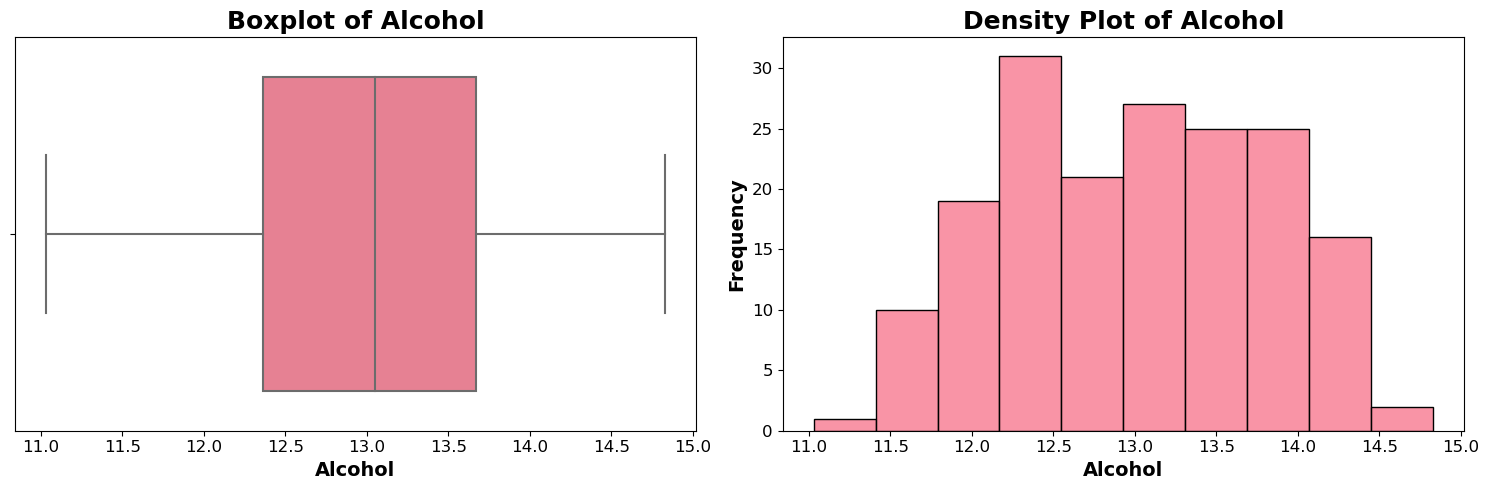

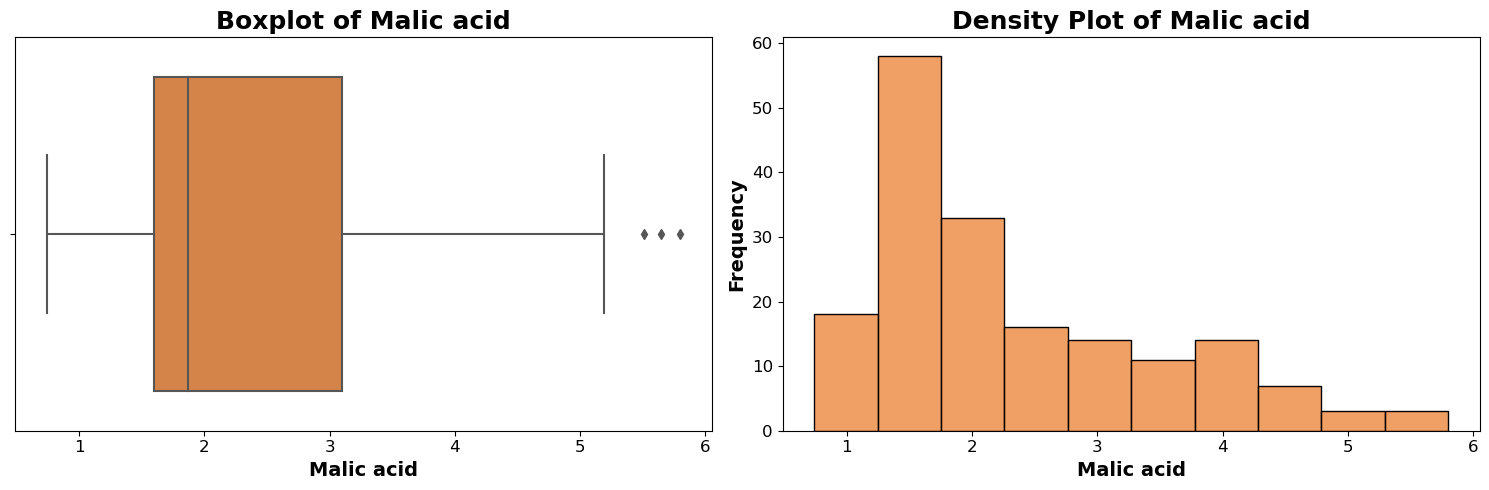

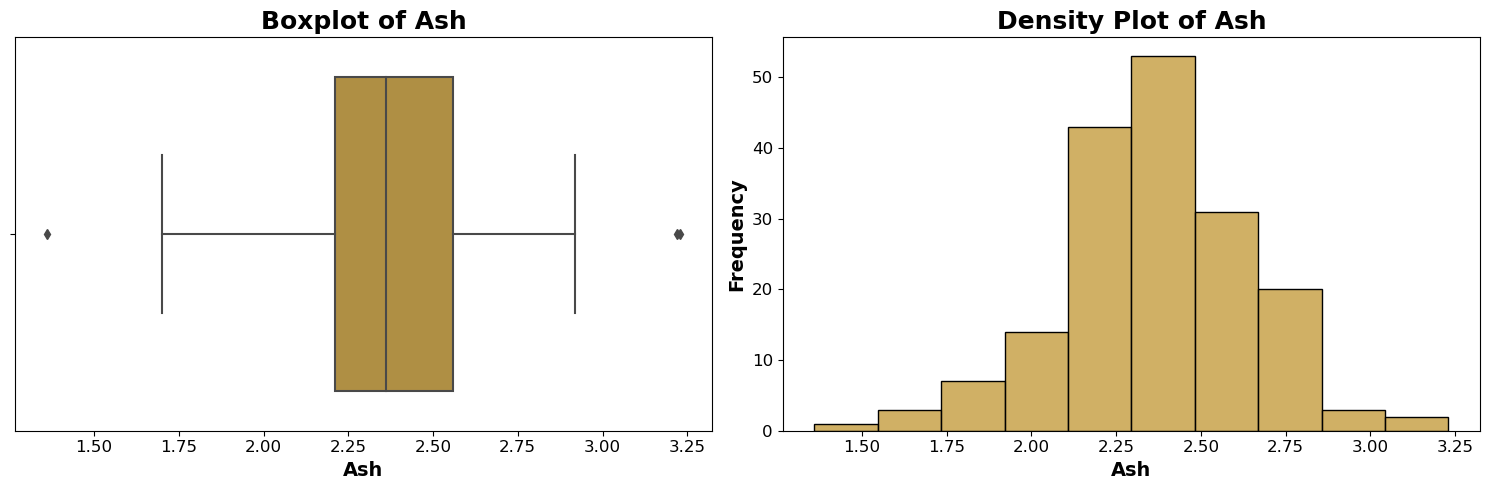

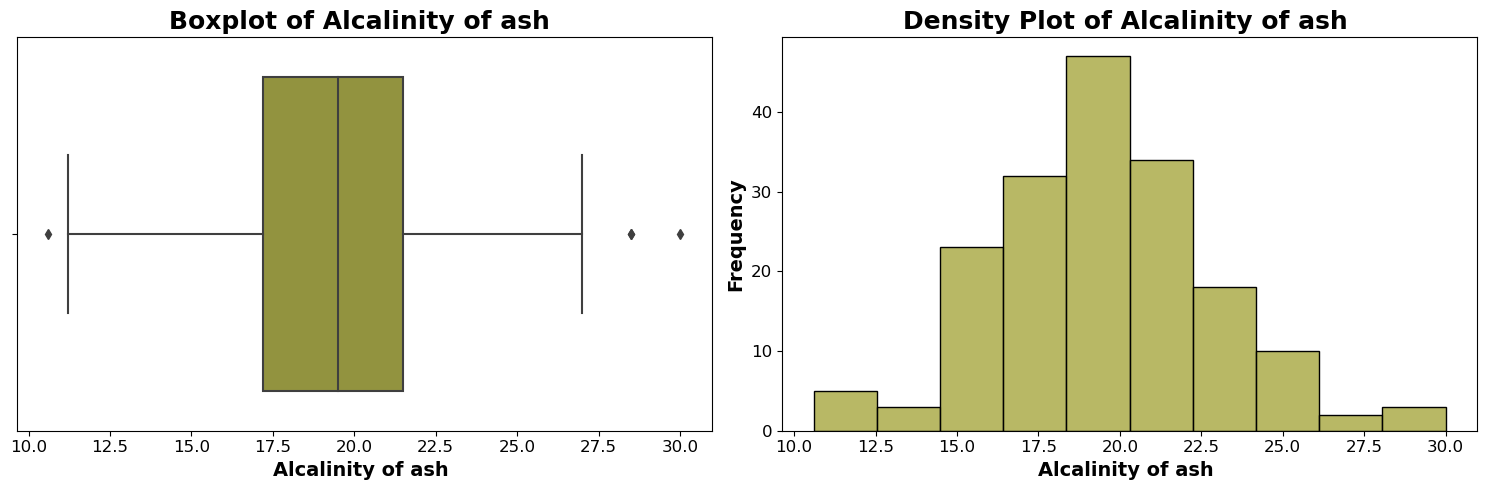

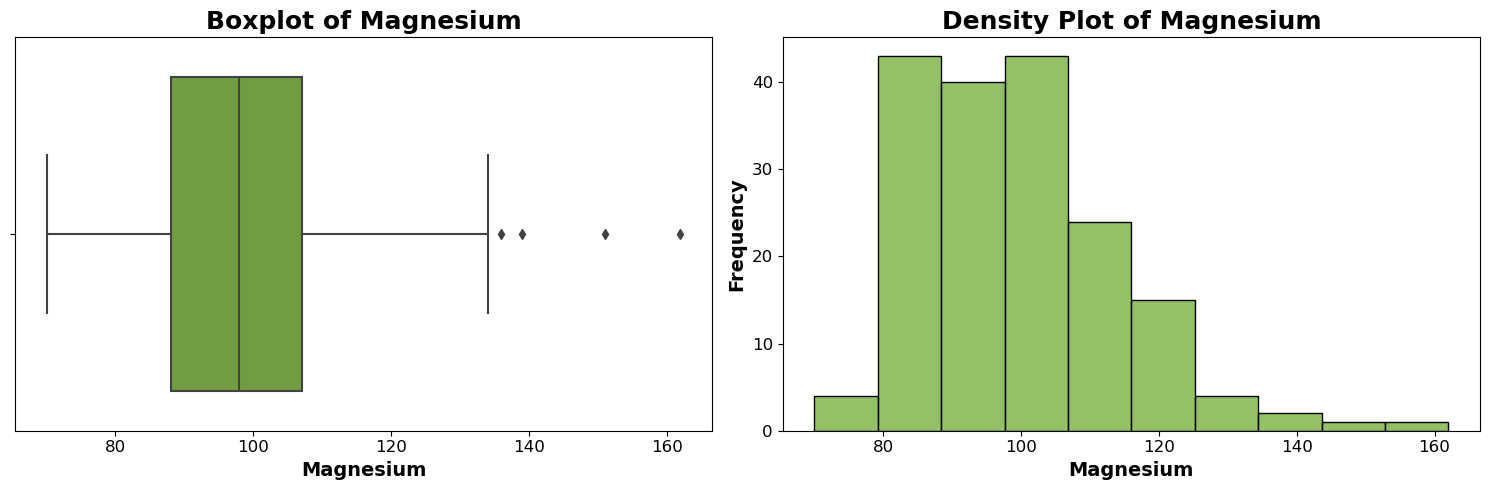

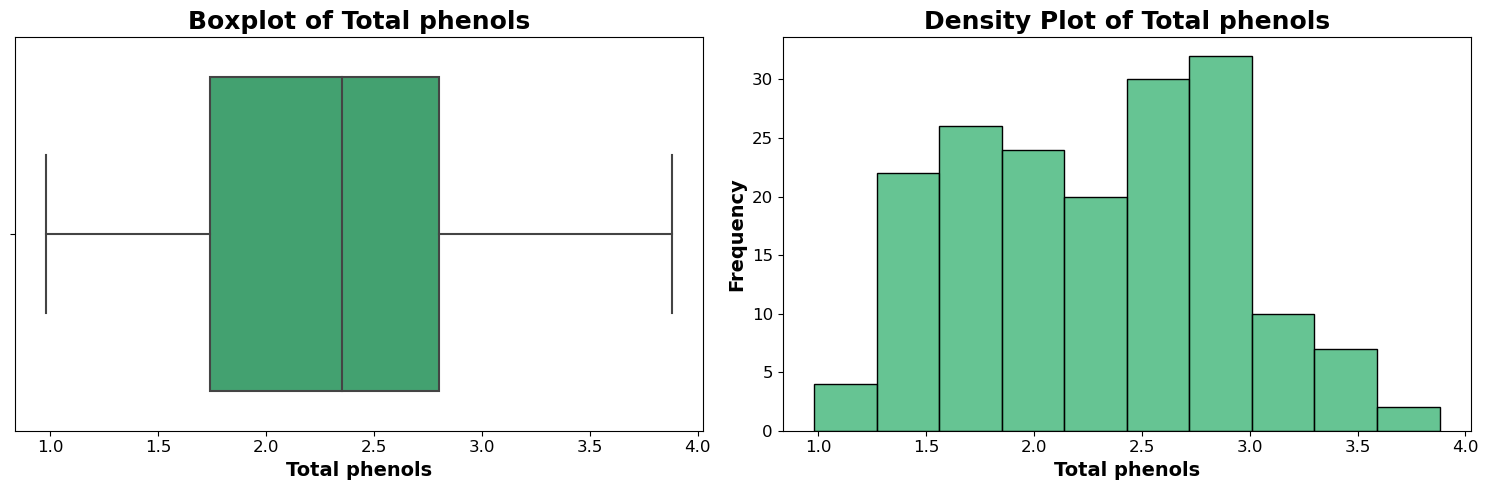

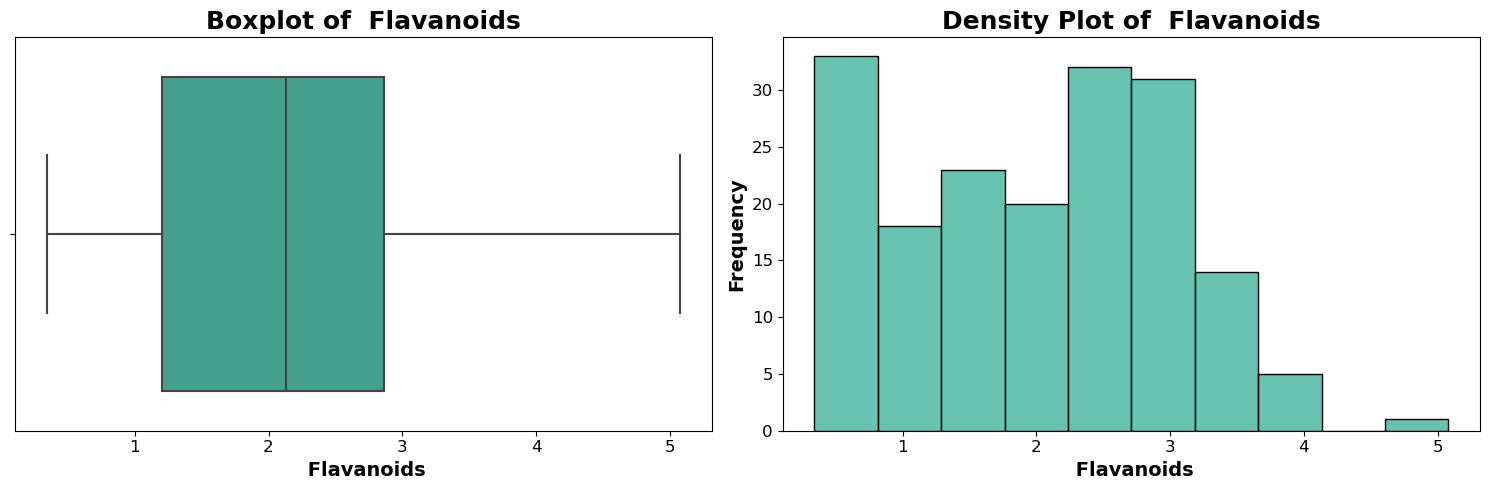

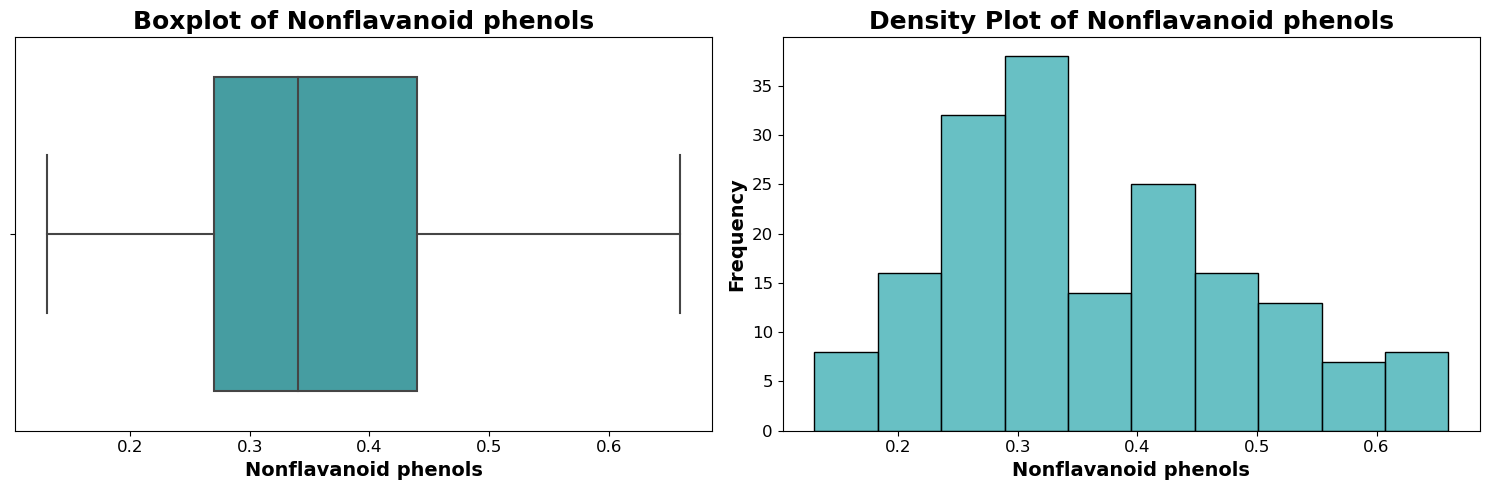

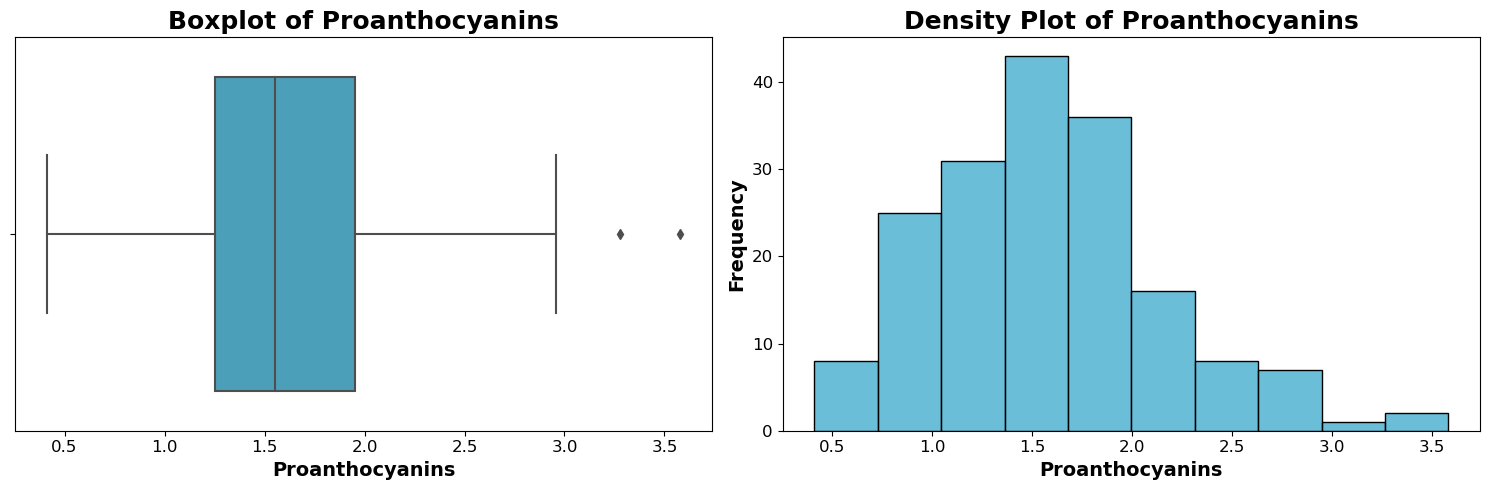

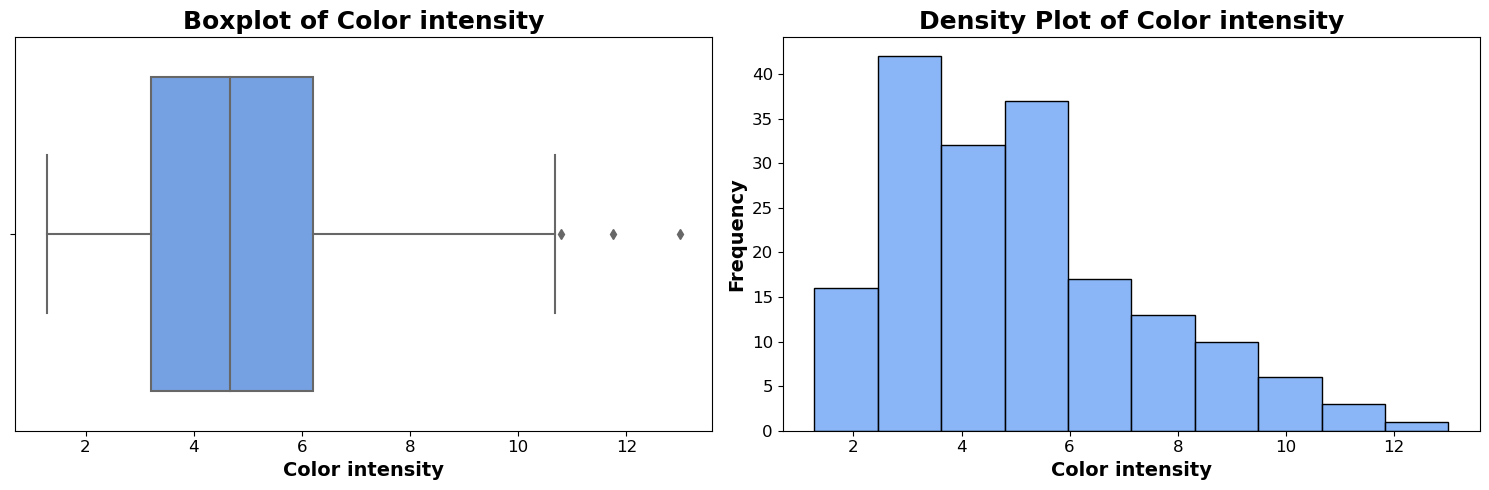

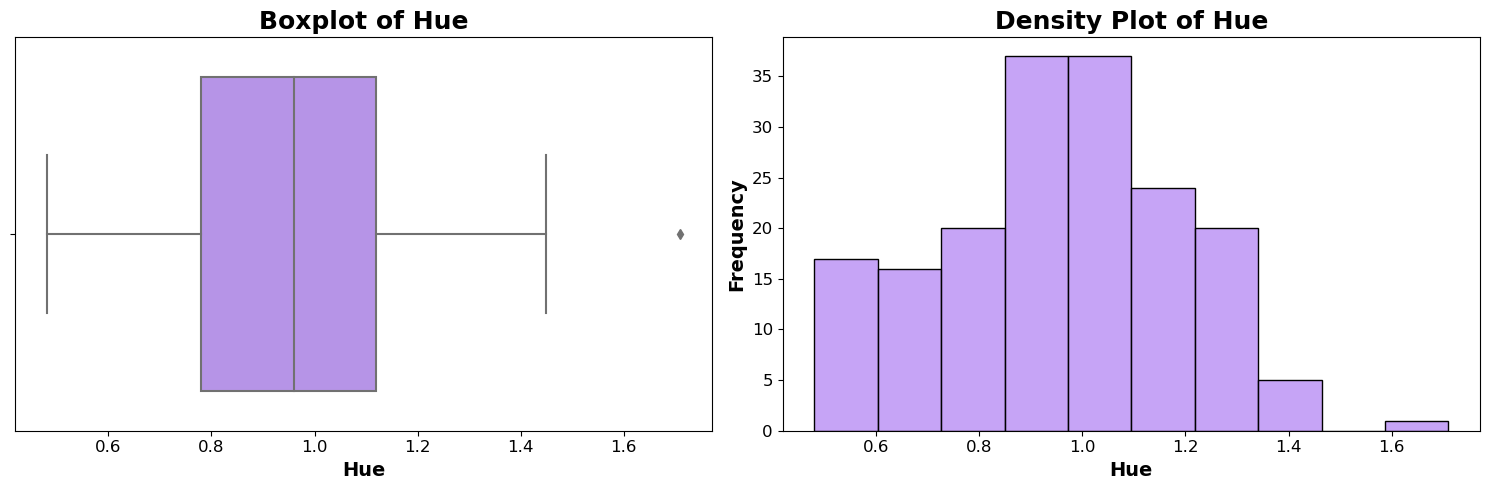

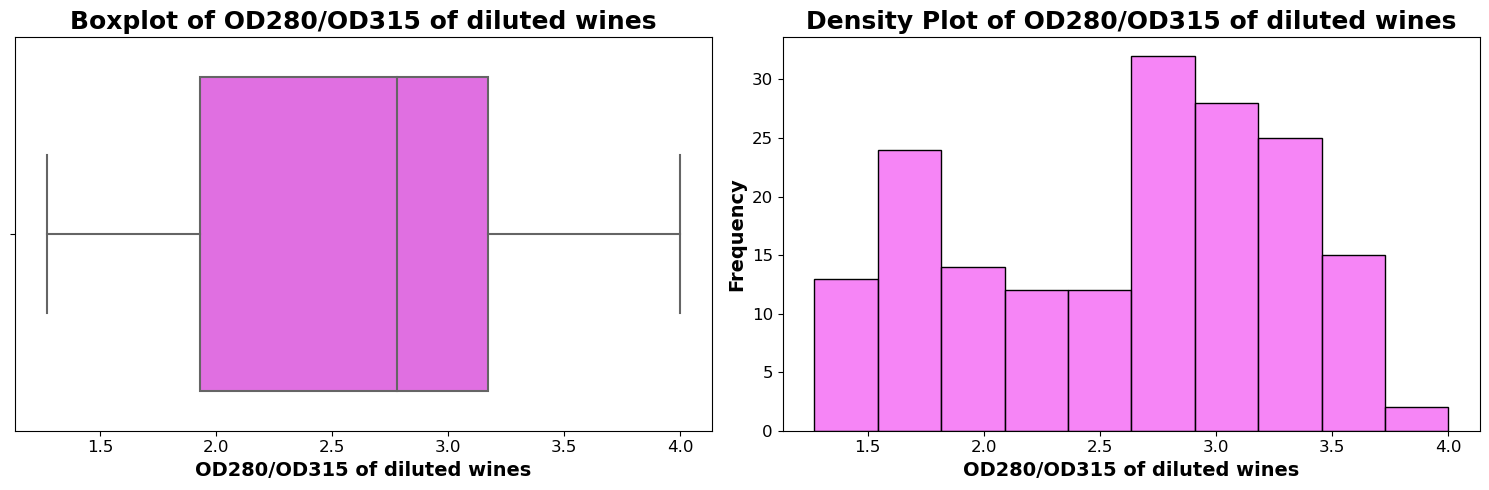

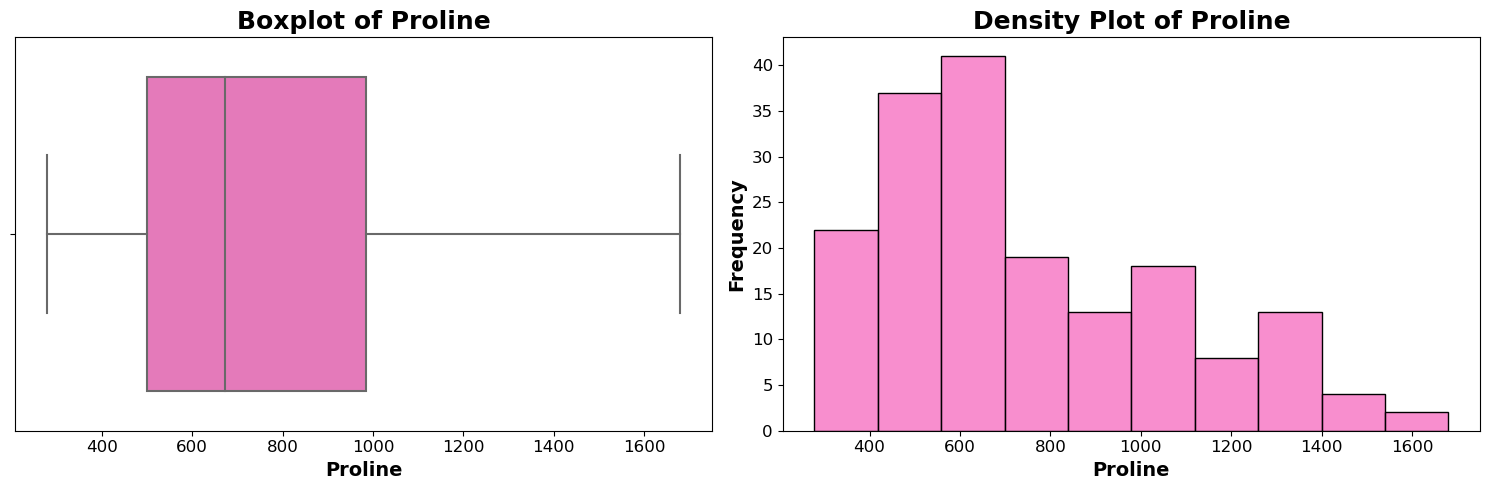

In [11]:
plot_columns(X)

From the graphs and the previous points, we conclude:
- All the variables in the dataset, except the target variable, are continuous numerical.
- There are no missing values in any of the variables. 
- From the basic statistical values we can see that none of the variables follows a normal distribution, since none has mean 0 and standard deviation 1. 
- In the histograms we can observe how the alcohol variable has a more or less centered distribution, with most of the records having values between 12 and 14 degrees, as for color_intensity and magnesium, we observe that their distributions are skewed to the left. 

In [12]:
# We define columns with outliers and without outliers
col_out=['Proline','Color intensity','Malic acid','Magnesium', 'Proanthocyanins']
col_wout=[column for column in X.columns if column not in col_out]

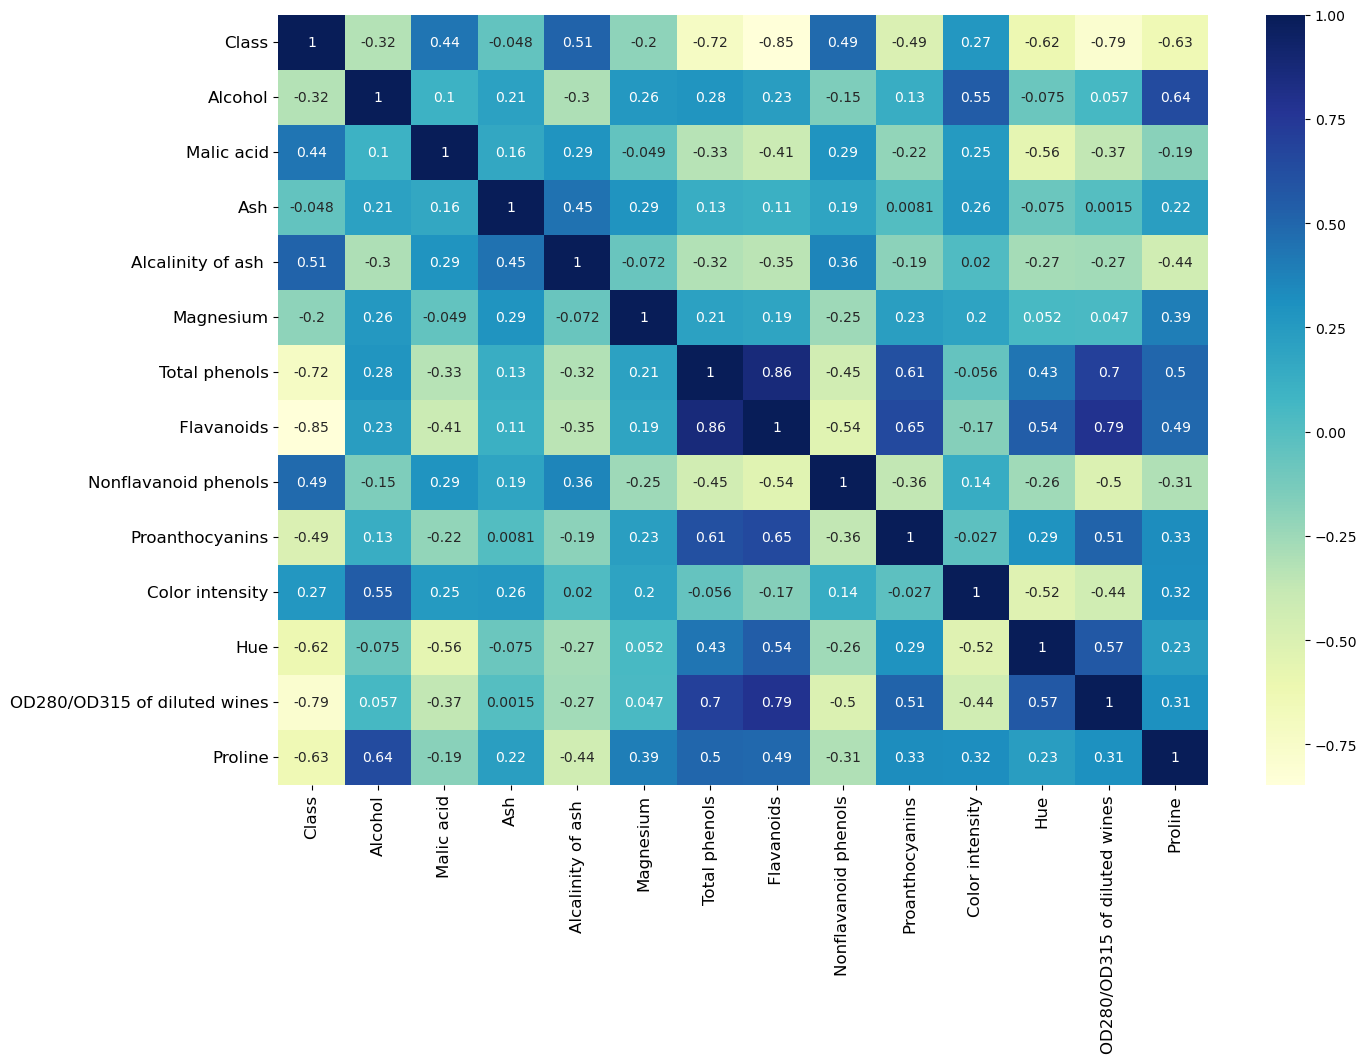

In [13]:
# Looking into the correlation
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
corr_matrix = df.select_dtypes(include=['float64', 'int']).corr(method='pearson')
sns.heatmap(corr_matrix,cmap="YlGnBu",  annot=True, ax=ax)
ax.tick_params(axis='both', which='major', labelsize=12)

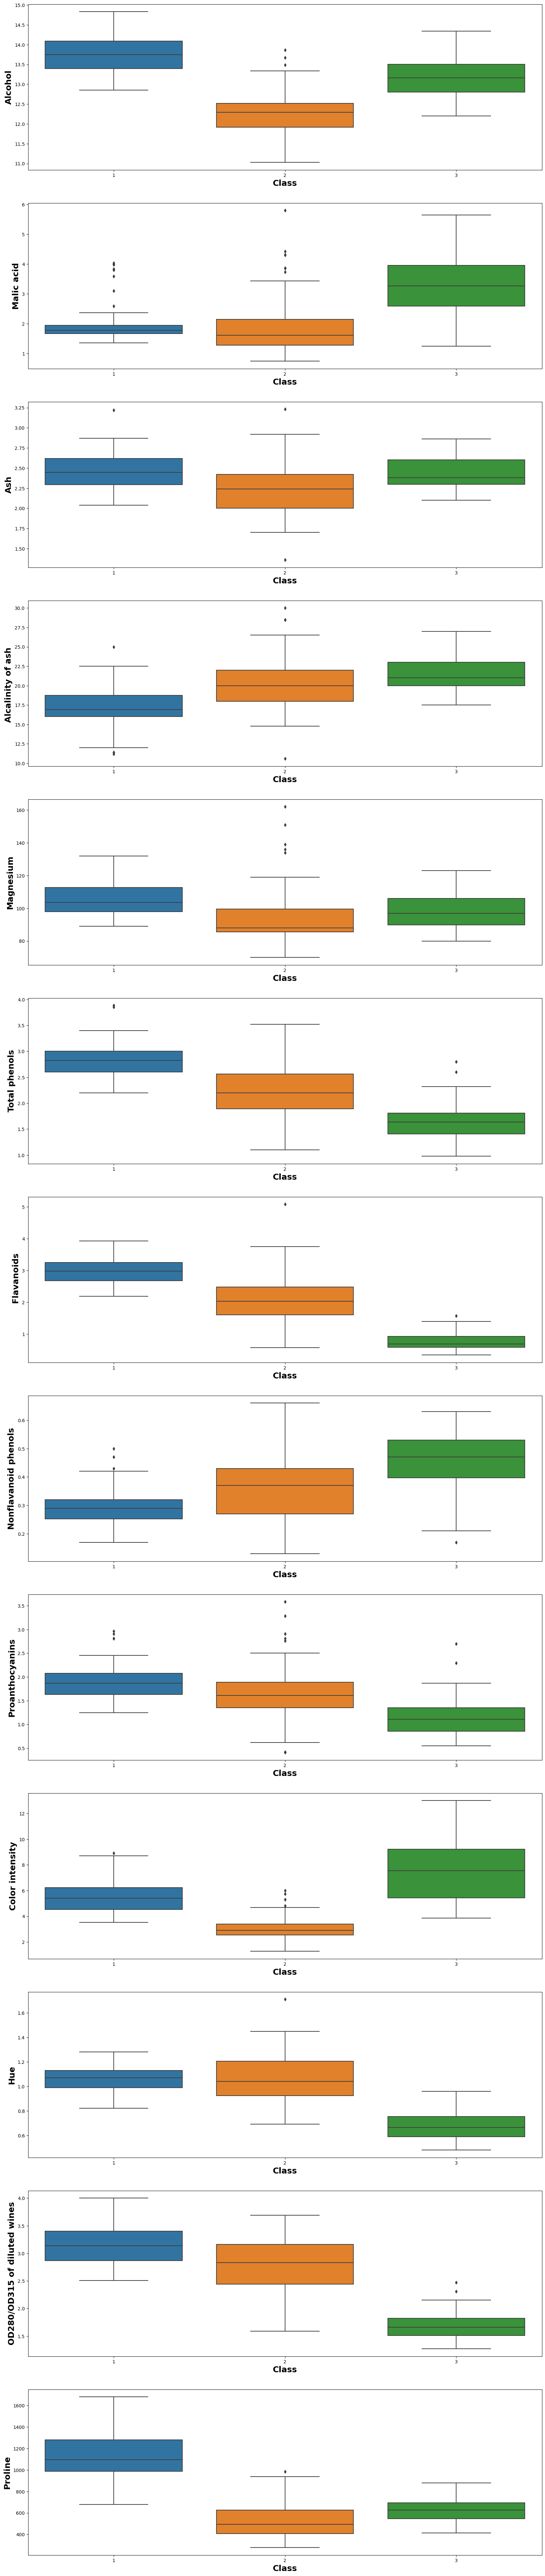

In [14]:
# Boxplot of X variables as function of target variable
# ==============================================================================
fig, axs = plt.subplots(ncols=1, nrows=len(X.columns), figsize=(20, 100))
row=0
for i in X.columns:
    sns.boxplot(data=df, x='Class', y=df[i], ax=axs[row])
    axs[row].set_xlabel(str('Class'), fontsize = 18, fontweight = "bold")
    axs[row].set_ylabel(str(i), fontsize = 18, fontweight = "bold")
    row+=1

We can tell that all the variables except 'Ash' have distinct difference when target is 0, 1 or 2, suggesting that they are important predictor. However, ‘Ash' appear to be less outstanding, as the box plot distribution is similar between target groups. Hence we may get rid of it:

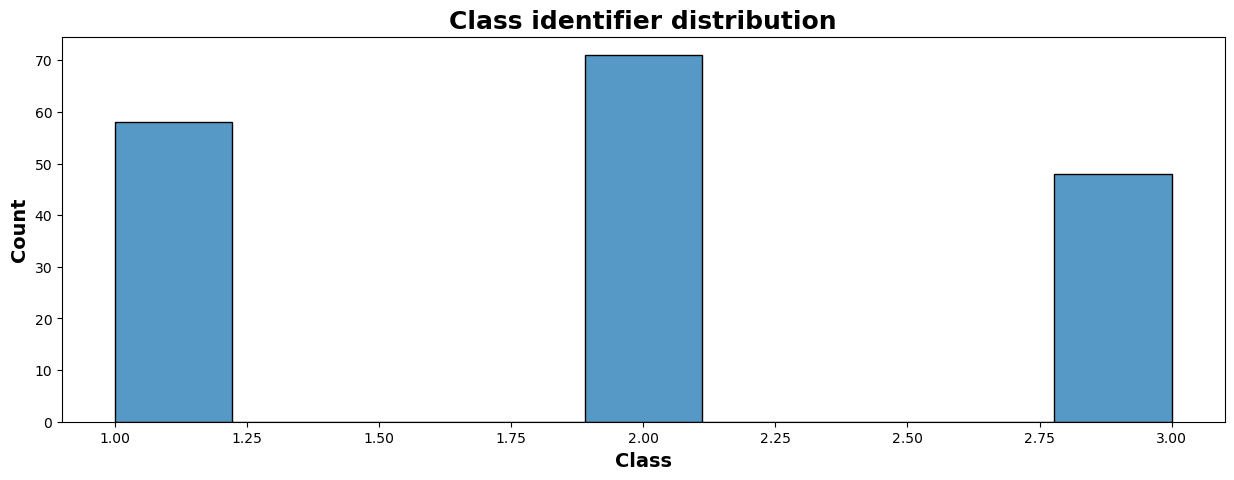

In [15]:
# Distribution dependent-variable
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
sns.histplot(data=df, x='Class', kde=False,ax=ax)
ax.set_title("Class identifier distribution", fontsize = 18, fontweight = "bold")
ax.set_xlabel('Class', fontsize = 14, fontweight = "bold");
ax.set_ylabel('Count',fontsize = 14, fontweight = "bold");

The target variable is relatively balanced.

In [16]:
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

In [17]:
find_outliers_IQR(X)
outlier_indices = find_outliers_IQR(X).index[~find_outliers_IQR(X).isnull().all(axis=1)]
outlier_indices
# Remove the outliers from the original dataset
df_without_outliers = df.drop(outlier_indices)
df=df_without_outliers 

In [18]:
df

Class  Alcohol  Malic acid   Ash  Alcalinity of ash   Magnesium  \
0        1    13.20        1.78  2.14                11.2        100   
1        1    13.16        2.36  2.67                18.6        101   
2        1    14.37        1.95  2.50                16.8        113   
3        1    13.24        2.59  2.87                21.0        118   
4        1    14.20        1.76  2.45                15.2        112   
..     ...      ...         ...   ...                 ...        ...   
171      3    14.16        2.51  2.48                20.0         91   
173      3    13.40        3.91  2.48                23.0        102   
174      3    13.27        4.28  2.26                20.0        120   
175      3    13.17        2.59  2.37                20.0        120   
176      3    14.13        4.10  2.74                24.5         96   

     Total phenols   Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0             2.65         2.76                  0.26             1.28   
1             2.80         3.24                  0.30             2.81   
2             3.85         3.49                  0.24             2.18   
3             2.80         2.69                  0.39             1.82   
4             3.27         3.39                  0.34             1.97   
..             ...          ...                   ...              ...   
171           1.68         0.70                  0.44             1.24   
173           1.80         0.75                  0.43             1.41   
174           1.59         0.69                  0.43             1.35   
175           1.65         0.68                  0.53             1.46   
176           2.05         0.76                  0.56             1.35   

     Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0               4.38  1.05                          3.40     1050  
1               5.68  1.03                          3.17     1185  
2               7.80  0.86                          3.45     1480  
3               4.32  1.04                          2.93      735  
4               6.75  1.05                          2.85     1450  
..               ...   ...                           ...      ...  
171             9.70  0.62                          1.71      660  
173             7.30  0.70                          1.56      750  
174            10.20  0.59                          1.56      835  
175             9.30  0.60                          1.62      840  
176             9.20  0.61                          1.60      560  

[161 rows x 14 columns]

In [19]:
# We definte the predictor variables, X and the target variable, y
X=df.drop(columns=['Class','Ash'], axis=1)
y=df['Class']

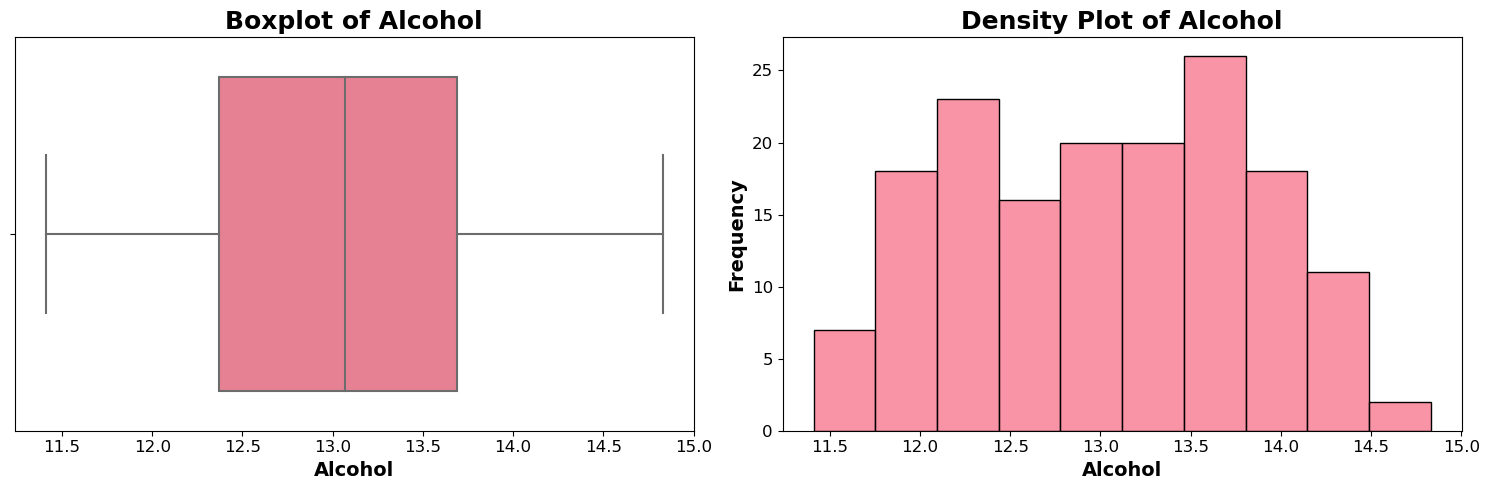

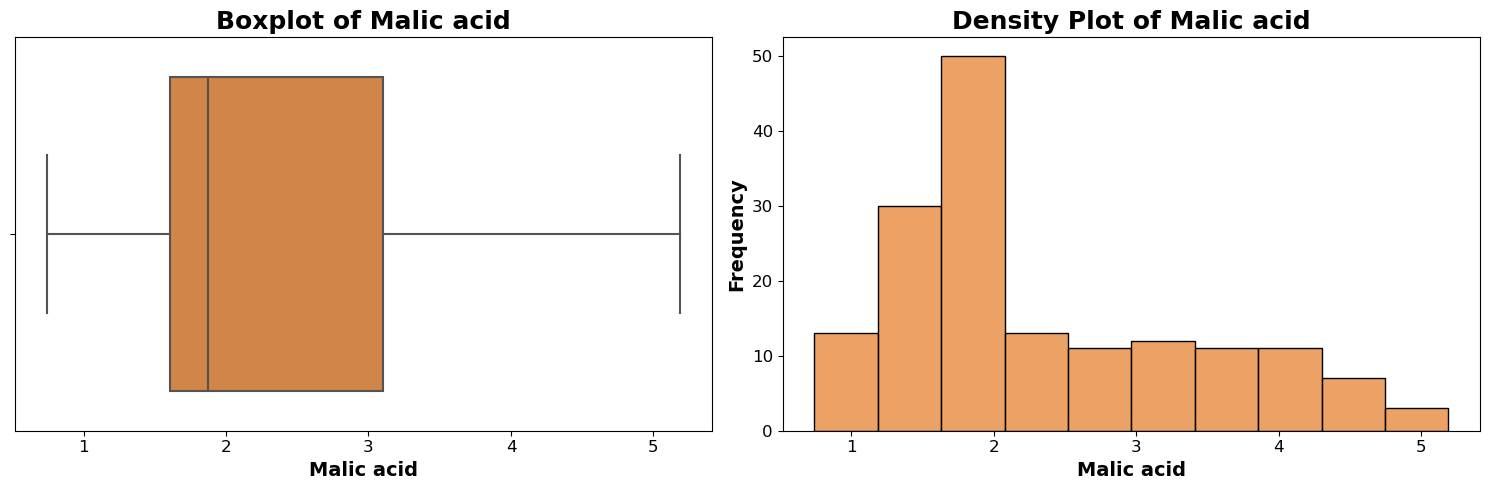

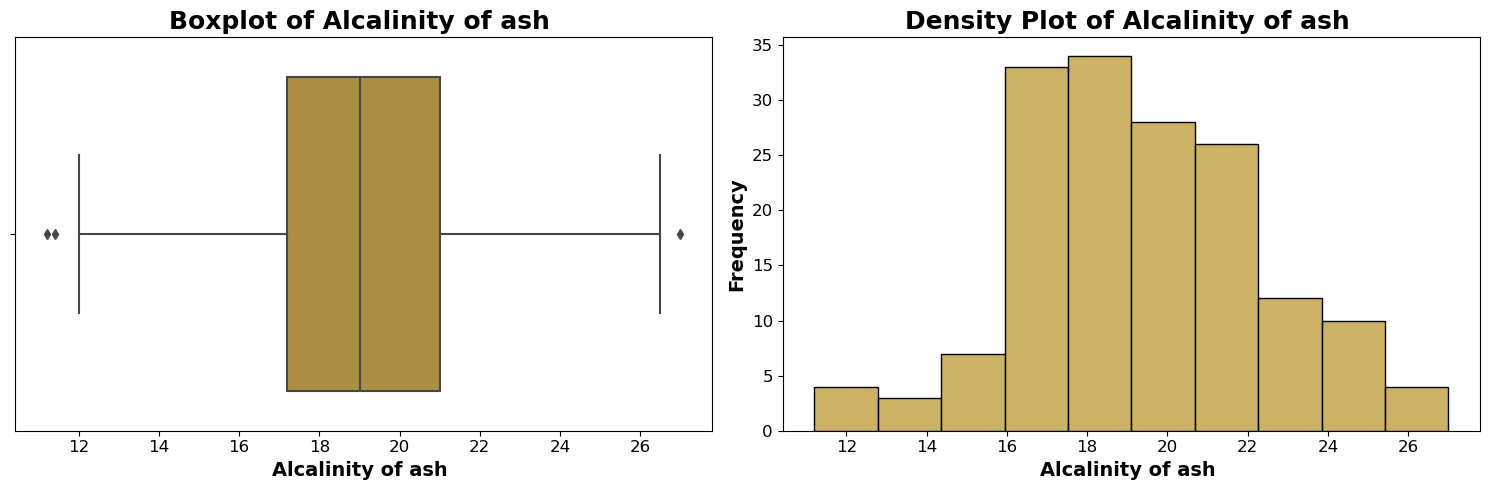

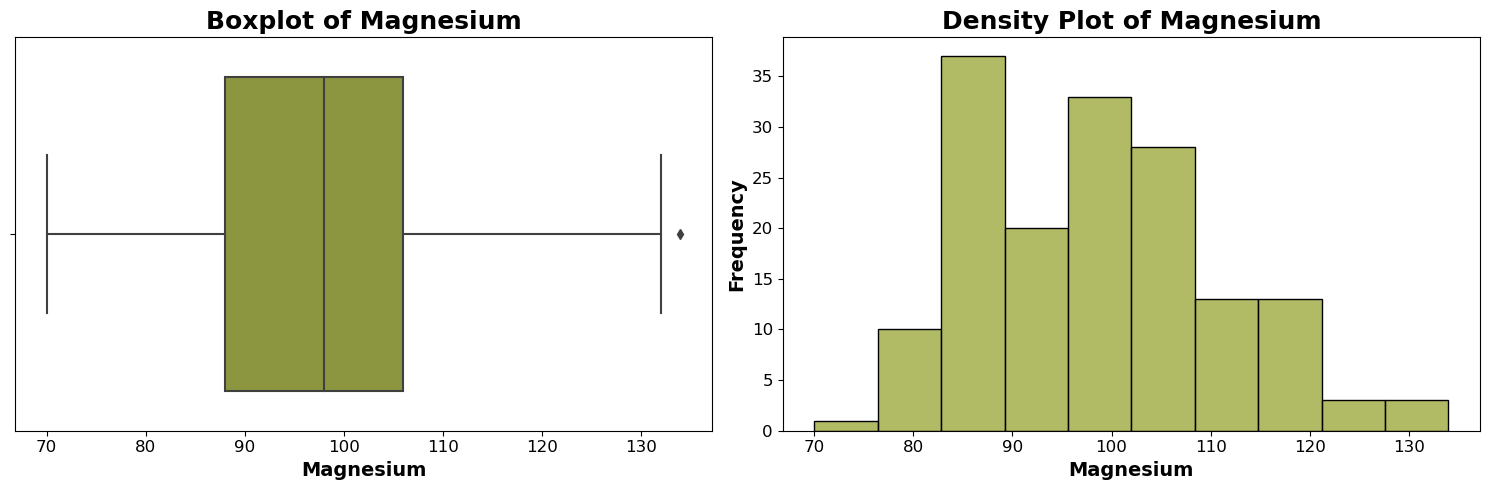

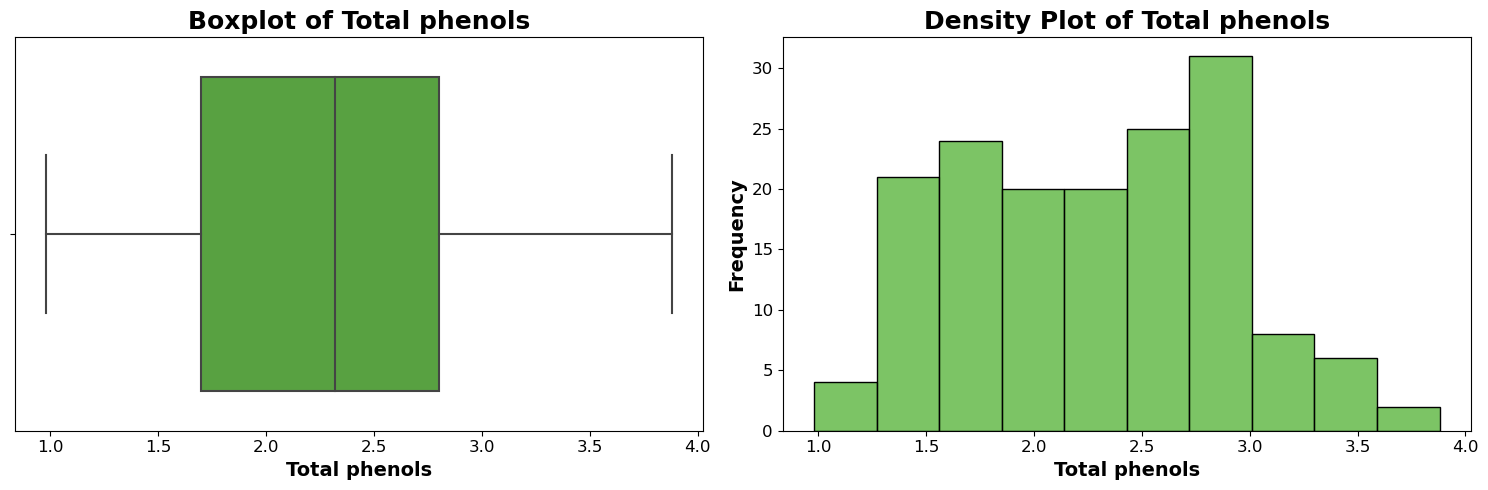

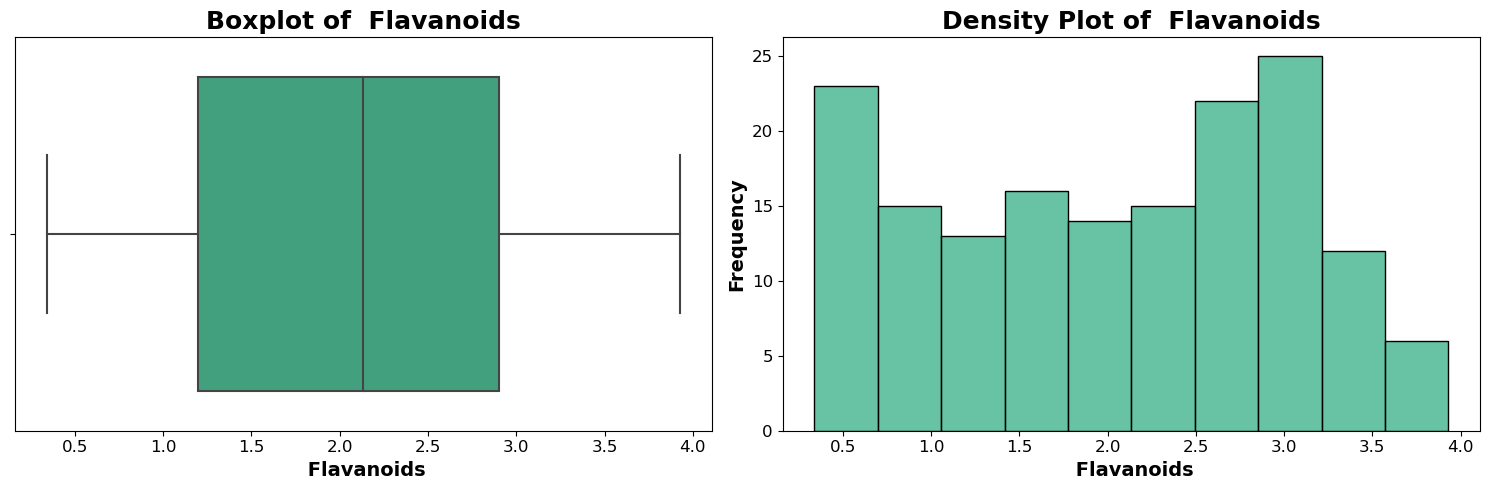

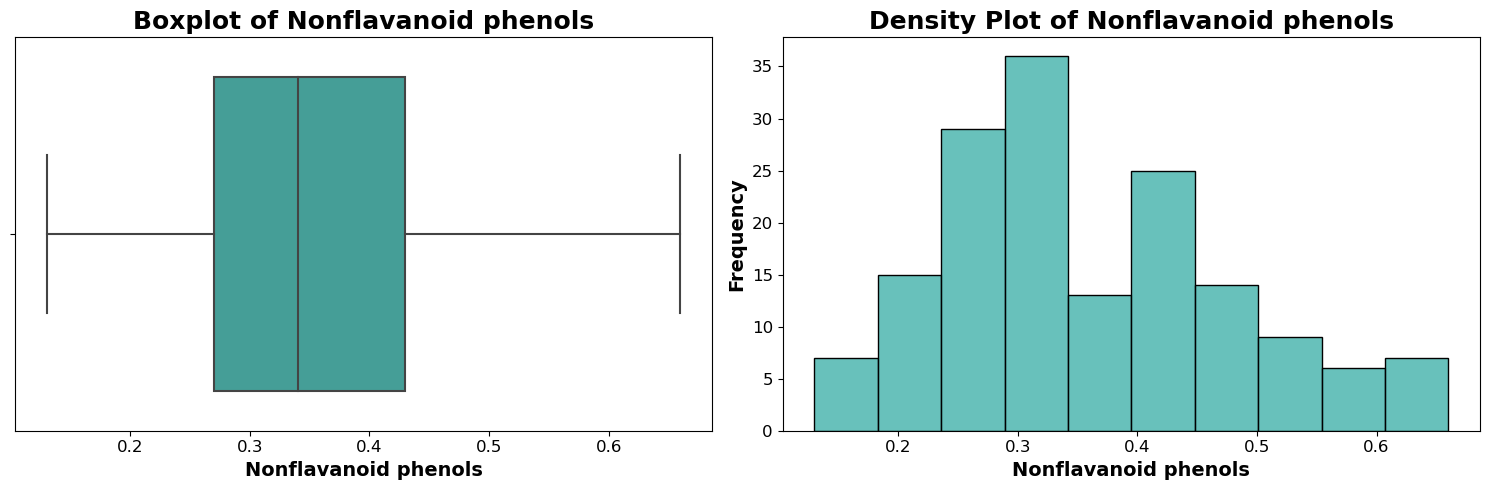

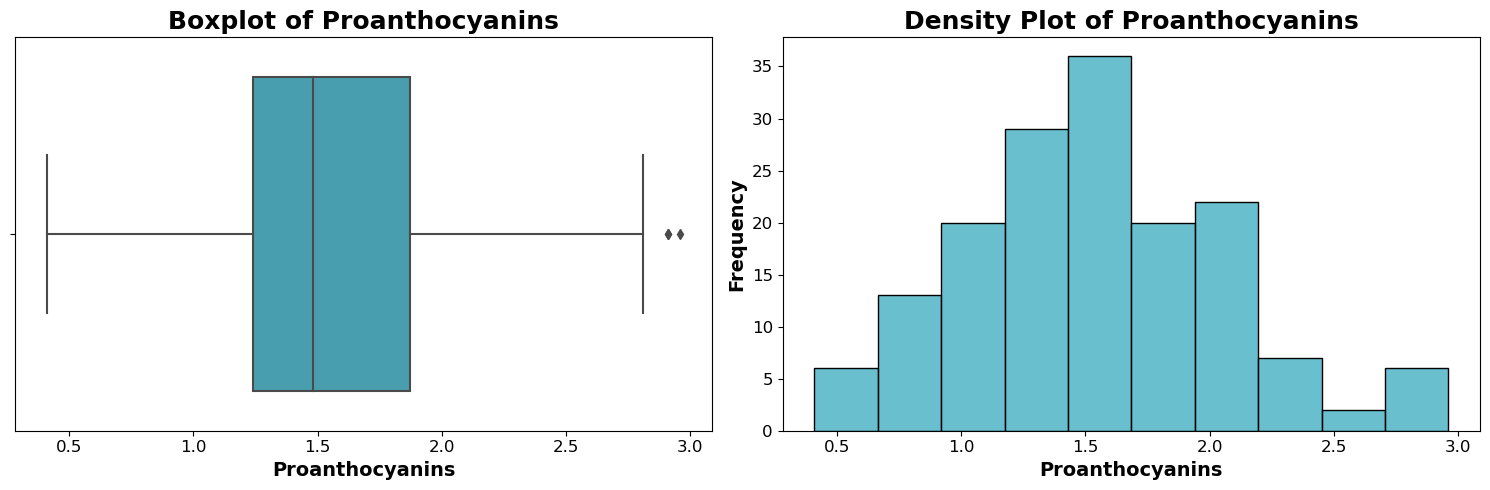

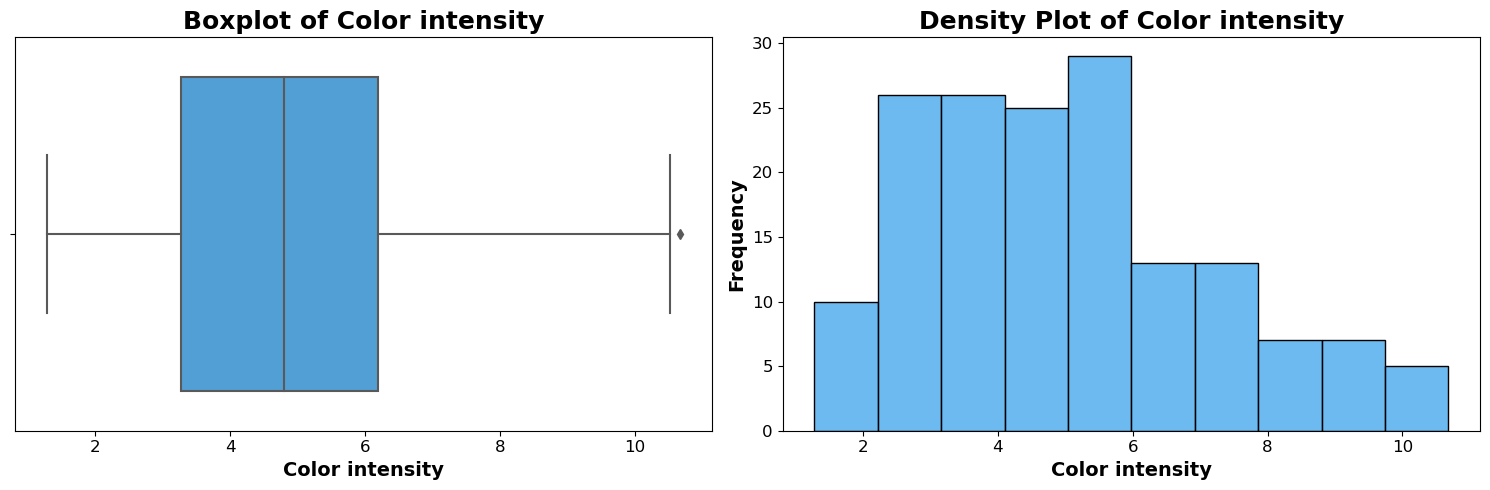

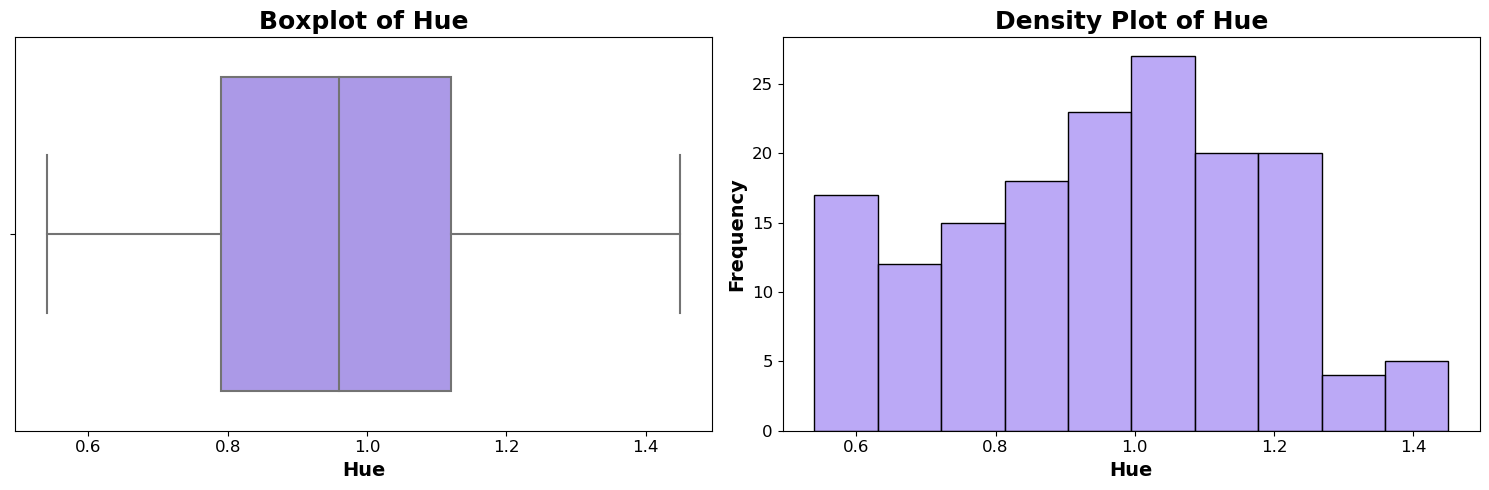

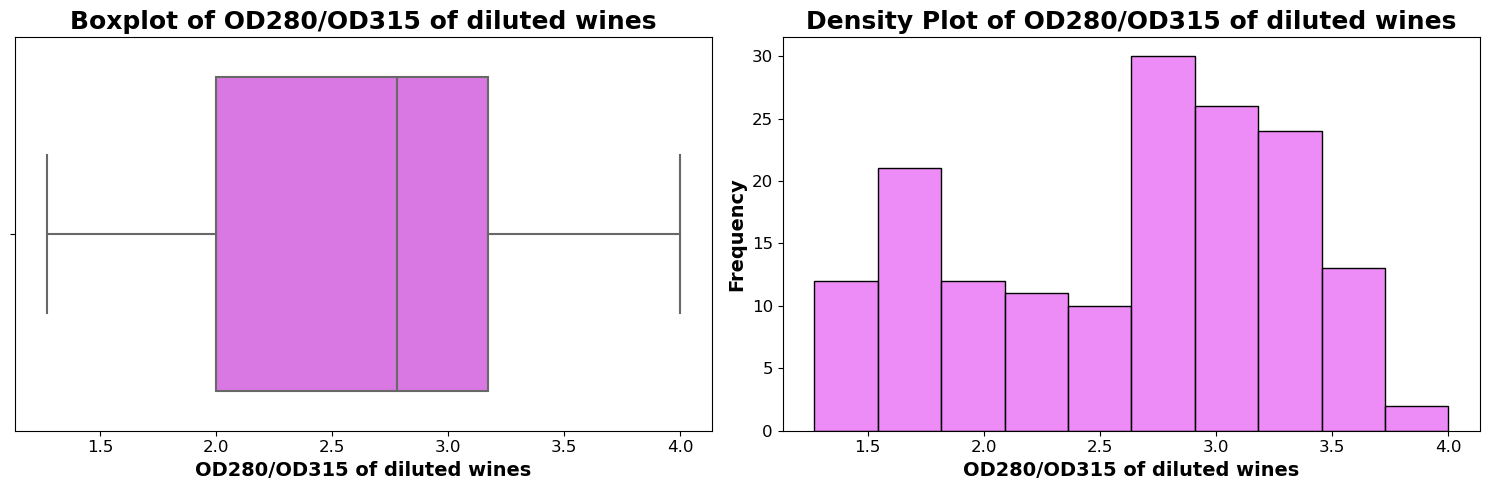

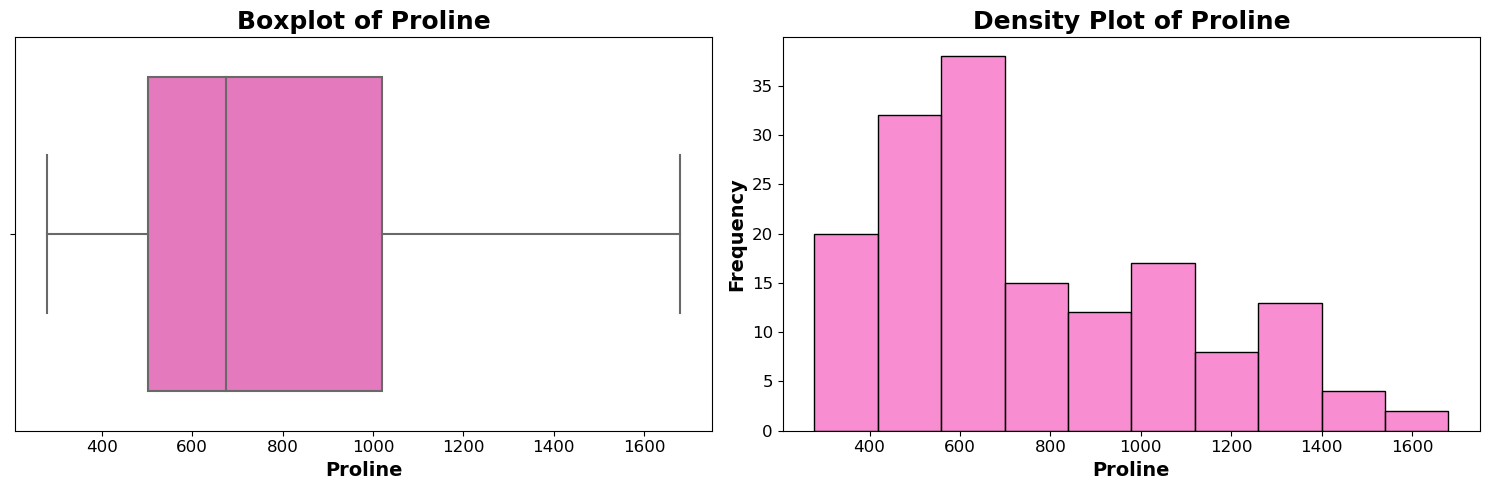

In [20]:
plot_columns(X)

<div class="alert alert-success h1" role="alert">
    <b> Best model
</b>
<a class="anchor" id="intro"></a> </div>


In [21]:
# Transforming variables
# ==============================================================================

# Numerical transformations for variables with outliers
numeric_transformer = Pipeline(
                        steps=[
                            ('imputer', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())
                        ]
                      )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, X.columns)
                    ],
                    remainder = 'drop'
                )
# Pipeline
# ==============================================================================

from sklearn import set_config
set_config(display='diagram')

preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Alcohol', 'Malic acid', 'Alcalinity of ash ', 'Magnesium',
       'Total phenols', ' Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object'))])

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(128, 12) (33, 12) (128,) (33,)


In [23]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedKFold

models = [LogisticRegression(),GaussianNB(), KNeighborsClassifier(), DecisionTreeClassifier(), SVC(), RandomForestClassifier(), GradientBoostingClassifier()]

The most important metric for a multiclass classification problem can vary depending on the specific problem and the context in which the model will be used. However, some commonly used metrics for evaluating the performance of a multiclass classification model include:
* Accuracy: This is the proportion of correctly classified instances out of all instances. It can be a good metric to use when the classes are balanced.
* Precision: This is the proportion of true positive instances out of all positive instances predicted by the model. It's a good metric when the model is used for rare events and the cost of false positives is high.

* Recall: This is the proportion of true positive instances out of all actual positive instances. It's a good metric when the model is used for common events and the cost of false negatives is high.

* F1-Score: This is the harmonic mean of precision and recall. It's a good metric when the model is used for rare events and the cost of false positives and negatives is high.

* Confusion Matrix: This is a matrix that shows the number of true positive, true negative, false positive, and false negative instances. It's a good metric to understand the model performance at the instance level.

* ROC AUC: This is the area under the ROC curve. It's a good metric to use when the classes are imbalanced.

* Log loss: This is the logarithm of the likelihood of the true labels given a set of predicted probabilities. It's a good metric to use when the model is used for probability estimates and the cost of false positives and negatives is high.

* R2 Score: This is the proportion of variation in the target variable that is explained by the model. It's a good metric when the model is used for regression problems.

* Jaccard Score: This is the proportion of true positive instances out of all actual positive and predicted positive instances. It's a good metric when the model is used for common events and the cost of false positives and negatives is high.

It's important to note that in order to choose the most appropriate metric for a multiclass classification problem, you should consider the business problem you are trying to solve and the costs of false positives and negatives. For this case, we will use  accuracy, precision, recall, F1-Score, R2 score and the confusion matrix. 

In [24]:
def fit_predict_metrics_with_model(model, Xdataset, ydataset):
    """
    Fits a multiclass classification model, makes predictions, and calculates metrics.
    :param model: a multiclass classification model
    :param Xdataset: X data features
    :param ydataset: target dataset
    :return: a dictionary containing the true labels, predicted labels, and metrics
    """
    X_train, X_test, y_train, y_test = train_test_split(Xdataset, ydataset, test_size=0.2, random_state=42)

    pipe = Pipeline([('preprocessing', preprocessor),
                 ('model', model)])
    # fit the model
    pipe.fit(X_train, y_train)
    # make predictions
    y_pred = pipe.predict(X_test)
    # perform cross-validation
    rskf = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 2, random_state = 42)
    cv_score = cross_val_score(model, Xdataset, ydataset, cv=rskf)
    cv_score_mean=cv_score.mean()
    # calculate metrics
    metrics = {}
    metrics['accuracy'] = accuracy_score(y_test, y_pred)
    metrics['precision'] = precision_score(y_test, y_pred, average='macro')
    metrics['recall'] = recall_score(y_test, y_pred, average='macro')
    metrics['f1_score'] = f1_score(y_test, y_pred, average='macro')
    metrics['r2_score'] = r2_score(y_test, y_pred)
    metrics['cv_score_mean']=cv_score_mean
    metrics['confusion_matrix'] = confusion_matrix(y_test, y_pred)
    # create a dataframe from the metrics
    metrics_df = pd.DataFrame.from_dict(metrics, orient='index')
    metrics_df.columns=[model.__class__.__name__]
    metrics_df.index.name='metrics'
    return {'y_true': y_test, 'y_pred': y_pred, 'metrics': metrics_df}

In [25]:
# list to store the results
results_list = []

# for loop to iterate over the list of models
for model in models:
    # call the function
    result = fit_predict_metrics_with_model(model, Xdataset=X, ydataset=y)
    # append the result to the list
    results_list.append(result['metrics'])

# concatenate the list of dataframes
metrics= pd.concat(results_list, axis=1)

In [26]:
metrics=metrics.T
metrics=metrics.sort_values(by='accuracy',  ascending=False)
metrics

metrics                     accuracy precision    recall  f1_score  r2_score  \
LogisticRegression               1.0       1.0       1.0       1.0       1.0   
SVC                              1.0       1.0       1.0       1.0       1.0   
RandomForestClassifier           1.0       1.0       1.0       1.0       1.0   
GradientBoostingClassifier       1.0       1.0       1.0       1.0       1.0   
GaussianNB                  0.969697  0.958333  0.974359  0.964444  0.947115   
KNeighborsClassifier        0.969697  0.958333  0.974359  0.964444  0.947115   
DecisionTreeClassifier      0.939394  0.955556  0.904762  0.920635  0.894231   

metrics                    cv_score_mean                     confusion_matrix  
LogisticRegression              0.947159  [[13, 0, 0], [0, 13, 0], [0, 0, 7]]  
SVC                             0.723485  [[13, 0, 0], [0, 13, 0], [0, 0, 7]]  
RandomForestClassifier           0.97822  [[13, 0, 0], [0, 13, 0], [0, 0, 7]]  
GradientBoostingClassifier       0.95625  [[13, 0, 0], [0, 13, 0], [0, 0, 7]]  
GaussianNB                       0.95947  [[13, 0, 0], [0, 12, 1], [0, 0, 7]]  
KNeighborsClassifier            0.708049  [[13, 0, 0], [0, 12, 1], [0, 0, 7]]  
DecisionTreeClassifier          0.909659  [[13, 0, 0], [0, 13, 0], [0, 2, 5]]

In [27]:
import plotly.graph_objects as go
fig = go.Figure(data=[
    go.Bar(name='F1 Score', y=metrics.index, x=metrics['f1_score'], orientation='h'),
    go.Bar(name='Accuracy', y=metrics.index, x=metrics['accuracy'], orientation='h'), 
    go.Bar(name='Precision', y=metrics.index, x=metrics['precision'], orientation='h'),
    go.Bar(name='R2 Score', y=metrics.index, x=metrics['r2_score'], orientation='h'),
    go.Bar(name='CV mean', y=metrics.index, x=metrics['cv_score_mean'], orientation='h')
])
fig.update_layout(barmode='group')
fig.show()

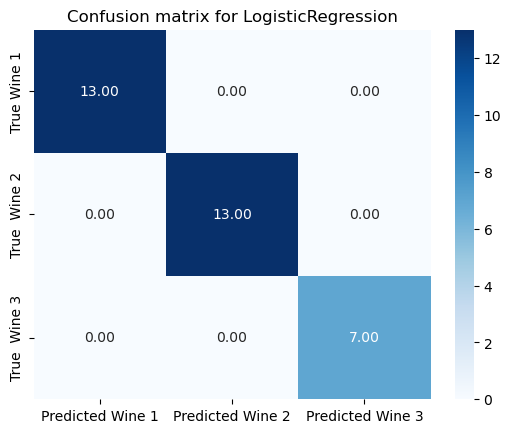

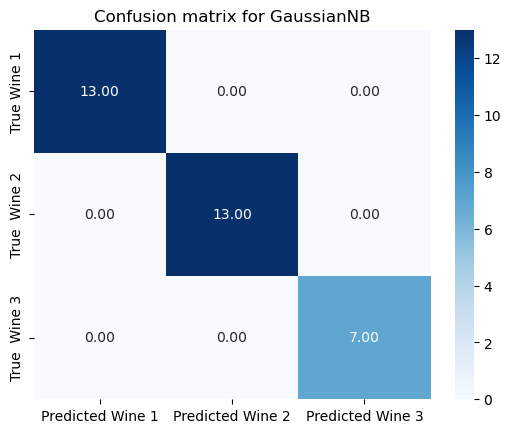

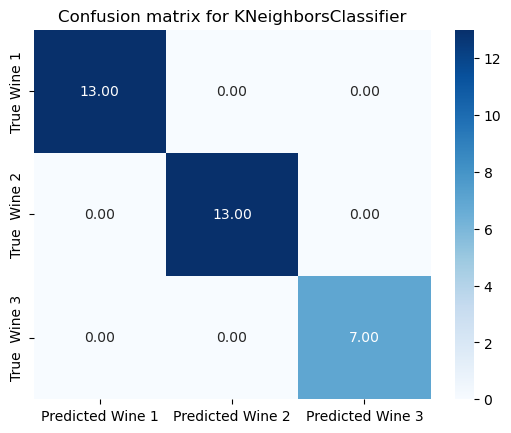

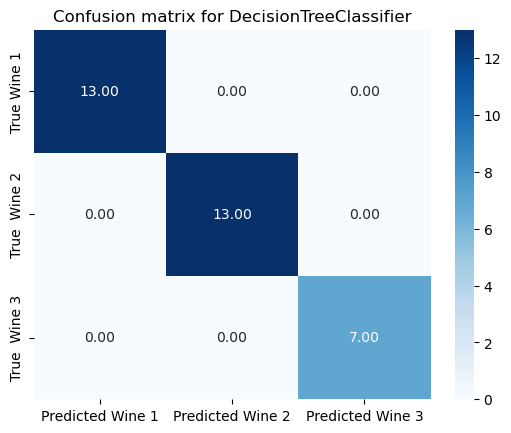

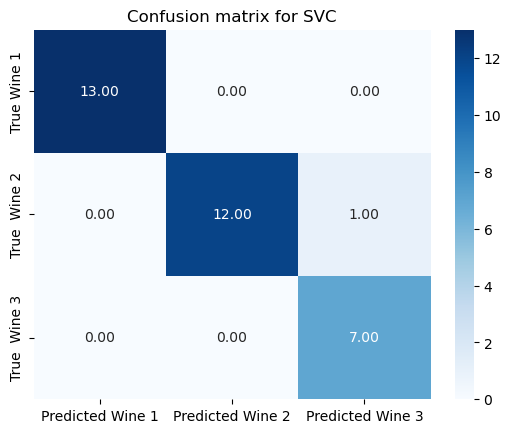

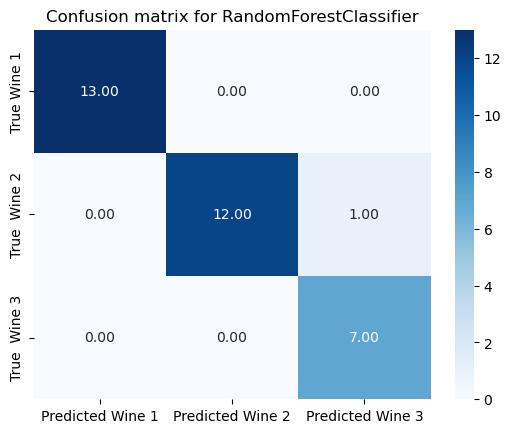

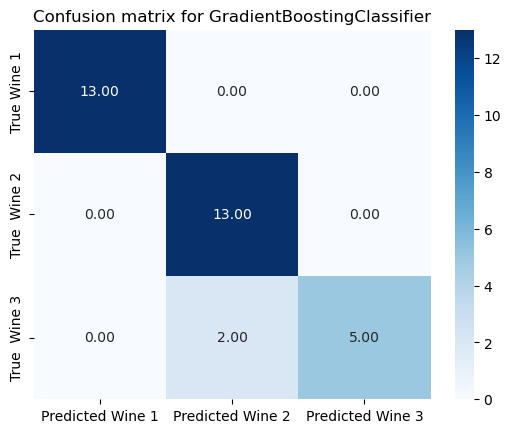

In [28]:
# Plot of the different confusion matrixs
for i,estimator  in enumerate(models):
    # extract the confusion matrix
    cm = metrics['confusion_matrix'][i]
    # plot the heatmap
    sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['Predicted Wine 1', 'Predicted Wine 2','Predicted Wine 3' ], yticklabels=['True Wine 1', 'True  Wine 2','True  Wine 3' ],fmt='.2f')
    plt.title(f"Confusion matrix for {estimator.__class__.__name__}")
    plt.show()

We select the Support Vector Machine (SVC) as the best model for this dataset as it provides the highest f1 score and accuracy, and the Random Forest Classifier (rfc) as it also shows a large accuracy, f1-score and a large score from the cross-validation. 

We observe that all the models predict correclty the type III wine, while most of the models show errors predicting the type II wine, and some also the type I wine. Overall, the randomforest model is the best model for this dataset as it has a large f1-score and large cv_mean score.

<div class="alert alert-success h1" role="alert">
    <b> Optimizing the best models: SVC and RFC
</b>
<a class="anchor" id="intro"></a> </div>

The Tree-structured Parzen Estimator (TPE) algorithm and the Grid Search algorithm are both methods for hyperparameter tuning in machine learning. 

The Grid Search algorithm is a simple and widely used method for hyperparameter tuning. It exhaustively searches over a specified parameter grid and returns the best set of parameters based on the chosen evaluation metric. It is easy to use and understand, but it can be computationally expensive, especially when the parameter space is large or the model is computationally expensive.

The TPE algorithm is a more advanced method for hyperparameter tuning. It uses a technique called Bayesian optimization, which adapts to the shape of the objective function and balances exploration and exploitation to search for the global optimum. TPE is more computationally efficient than Grid Search, especially when the parameter space is large. TPE also can handle categorical and conditional parameters. TPE can also be used to optimize multiple objectives simultaneously, unlike Grid Search. 

In summary, the Grid Search algorithm is simple and widely used method that is easy to use and understand, but can be computationally expensive, while TPE algorithm is a more recent and advanced method that is more computationally efficient and can handle a wide range of parameters. Here, we will use the TPE algorithm using the optuna library in order to explore a large parameter space.

## SVC

In [29]:
import optuna

def optimize_svc(Xdataset, ydataset):
    """
    Optimize the hyperparameters of a SVC model using Optuna.
    :param X: features of the data
    :param y: labels of the data
    :return: the best set of hyperparameters
    """
    def objective(trial):
        # get the values of the hyperparameters
        C = trial.suggest_loguniform('C', 0.0001, 10000)
        kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly'])
        degree = trial.suggest_int('degree', 2, 3)
        gamma = trial.suggest_categorical('gamma', [0.1, 1, 'scale'])
        # create the model
        model = SVC(C=C, kernel=kernel, degree=degree, gamma=gamma)
        
        # split the data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(Xdataset, ydataset, test_size=0.2, random_state=42)
        pipe = Pipeline([('preprocessing', preprocessor),
                 ('model', model)])
        # fit the model
        pipe.fit(X_train, y_train)
        # make predictions
        y_pred = pipe.predict(X_test)
        
        # calculate the accuracy
        accuracy = accuracy_score(y_test, y_pred)
        
        # return the negative accuracy so that Optuna maximizes the accuracy
        return -accuracy

    # create the study
    study = optuna.create_study()

    # optimize the function
    study.optimize(objective, n_trials=10)

    # return the best hyperparameters
    return study.best_params

In [30]:
# get the best hyperparameters
best_params = optimize_svc(X, y)

# create the model using the best hyperparameters
model = SVC(**best_params)
result=fit_predict_metrics_with_model(model, Xdataset=X, ydataset=y)
y_pred=result['y_pred']
# create a dataframe
Final_results_SVC_TPE = pd.DataFrame({'y_true': y_test, 'y_pred': y_pred})
Final_metrics_SVC_TPE=pd.DataFrame(result['metrics'])

[I 2023-02-14 12:06:49,686] A new study created in memory with name: no-name-f63cf870-7532-4d1c-9fc5-17f042699b2d
[I 2023-02-14 12:06:49,699] Trial 0 finished with value: -0.3939393939393939 and parameters: {'C': 0.003673322350232657, 'kernel': 'poly', 'degree': 3, 'gamma': 'scale'}. Best is trial 0 with value: -0.3939393939393939.
[I 2023-02-14 12:06:49,709] Trial 1 finished with value: -0.3939393939393939 and parameters: {'C': 0.001725492102275495, 'kernel': 'rbf', 'degree': 3, 'gamma': 0.1}. Best is trial 0 with value: -0.3939393939393939.
[I 2023-02-14 12:06:49,720] Trial 2 finished with value: -1.0 and parameters: {'C': 2652.3914471097078, 'kernel': 'linear', 'degree': 3, 'gamma': 1}. Best is trial 2 with value: -1.0.
[I 2023-02-14 12:06:49,733] Trial 3 finished with value: -0.9696969696969697 and parameters: {'C': 441.1067764951026, 'kernel': 'poly', 'degree': 2, 'gamma': 1}. Best is trial 2 with value: -1.0.
[I 2023-02-14 12:06:49,745] Trial 4 finished with value: -1.0 and param

In [31]:
Final_metrics_SVC_TPE

SVC
metrics                                              
accuracy                                          1.0
precision                                         1.0
recall                                            1.0
f1_score                                          1.0
r2_score                                          1.0
cv_score_mean                                0.959943
confusion_matrix  [[13, 0, 0], [0, 13, 0], [0, 0, 7]]

In [32]:
def optimize_svc_with_grid_search(X, y):
    """
    Optimize the hyperparameters of a RandomForestClassifier model using GridSearchCV.
    :param X: features of the data
    :param y: labels of the data
    :param cv: number of cross-validation splits
    :return: the best set of hyperparameters and the best score
    """
    rskf = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 2, random_state = 42)
    # Define the grid of hyperparameters
    param_grid = {
        'C': [0.1, 1, 10, 100,1000],
        'kernel': ['linear', 'rbf', 'poly'],
        'degree': [1, 2, 3, 4],
        'gamma': ['scale', 'auto', 0.1, 1]
    }

    # create the grid search
    grid_search = GridSearchCV(SVC(), param_grid, cv=rskf, scoring='accuracy')

    # fit the grid search
    grid_search.fit(X, y)

    # return the best hyperparameters and the best score
    return grid_search.best_params_, grid_search.best_score_

In [33]:
# get the best hyperparameters
best_params= optimize_svc_with_grid_search(X, y)[0]
print(f'The score is: {optimize_svc_with_grid_search(X, y)[1]}')
# create the model using the best hyperparameters
model = SVC(**best_params)
result_SVC_GS=fit_predict_metrics_with_model(model, Xdataset=X, ydataset=y)
y_pred=result_SVC_GS['y_pred']
# create a dataframe
Final_results_SVC_GS = pd.DataFrame({'y_true': y_test, 'y_pred': y_pred})
Final_metrics_SVC_GS=pd.DataFrame(result_SVC_GS['metrics'])

The score is: 0.9599431818181818


In [34]:
Final_metrics_SVC_GS

SVC
metrics                                              
accuracy                                          1.0
precision                                         1.0
recall                                            1.0
f1_score                                          1.0
r2_score                                          1.0
cv_score_mean                                0.959943
confusion_matrix  [[13, 0, 0], [0, 13, 0], [0, 0, 7]]

In [35]:
(Final_results_SVC_GS['y_true']==Final_results_SVC_GS['y_pred']).value_counts()

True    33
dtype: int64

In [36]:
metrics_final_svc=pd.concat([Final_metrics_SVC_TPE, Final_metrics_SVC_GS], axis=1)
metrics_final_svc.columns = ['TPE_SVC', 'Grid Search_SVC']
metrics_final_svc

TPE_SVC  \
metrics                                                 
accuracy                                          1.0   
precision                                         1.0   
recall                                            1.0   
f1_score                                          1.0   
r2_score                                          1.0   
cv_score_mean                                0.959943   
confusion_matrix  [[13, 0, 0], [0, 13, 0], [0, 0, 7]]   

                                      Grid Search_SVC  
metrics                                                
accuracy                                          1.0  
precision                                         1.0  
recall                                            1.0  
f1_score                                          1.0  
r2_score                                          1.0  
cv_score_mean                                0.959943  
confusion_matrix  [[13, 0, 0], [0, 13, 0], [0, 0, 7]]

## RFC

In [37]:
def optimize_rfc(Xdataset, ydataset):
    """
    Optimize the hyperparameters of a RandomForestClassifier model using Optuna.
    :param X: features of the data
    :param y: labels of the data
    :return: the best set of hyperparameters
    """
    def objective(trial):
        # get the values of the hyperparameters
        n_estimators = trial.suggest_int('n_estimators', 10, 500)
        max_depth = trial.suggest_int('max_depth', 1, 20)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
        max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2', None])
        criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
        
        # create the model
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, 
                                       min_samples_split=min_samples_split, 
                                       min_samples_leaf=min_samples_leaf, 
                                       max_features=max_features, criterion=criterion)
        # split the data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(Xdataset, ydataset, test_size=0.2, random_state=42)
        pipe = Pipeline([('preprocessing', preprocessor),
                 ('model', model)])
        # fit the model
        pipe.fit(X_train, y_train)
        # make predictions
        y_pred = pipe.predict(X_test)
        # calculate the accuracy
        accuracy = accuracy_score(y_test, y_pred)
        
        # return the negative accuracy so that Optuna maximizes the accuracy
        return -accuracy

    # create the study
    study = optuna.create_study()

    # optimize the function
    study.optimize(objective, n_trials=100)

    # return the best hyperparameters
    return study.best_params

In [38]:
# get the best hyperparameters
best_params= optimize_rfc(X, y)

# create the model using the best hyperparameters
model = RandomForestClassifier(**best_params)
result_RFC=fit_predict_metrics_with_model(model, Xdataset=X, ydataset=y)
y_pred=result_RFC['y_pred']
# create a dataframe
Final_results_RFC_TPE = pd.DataFrame({'y_true': y_test, 'y_pred': y_pred})
Final_metrics_RFC_TPE=pd.DataFrame(result_RFC['metrics'])

[I 2023-02-14 12:08:43,064] A new study created in memory with name: no-name-c8ef41dc-6a5f-41aa-8a05-910b4d797904
[I 2023-02-14 12:08:43,522] Trial 0 finished with value: -1.0 and parameters: {'n_estimators': 475, 'max_depth': 7, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 'auto', 'criterion': 'gini'}. Best is trial 0 with value: -1.0.
[I 2023-02-14 12:08:43,604] Trial 1 finished with value: -1.0 and parameters: {'n_estimators': 69, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'auto', 'criterion': 'entropy'}. Best is trial 0 with value: -1.0.
[I 2023-02-14 12:08:44,012] Trial 2 finished with value: -0.9393939393939394 and parameters: {'n_estimators': 368, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': None, 'criterion': 'entropy'}. Best is trial 0 with value: -1.0.
[I 2023-02-14 12:08:44,493] Trial 3 finished with value: -0.9393939393939394 and parameters: {'n_estimators': 413, 'max_depth': 3, 'min_sam

[I 2023-02-14 12:08:50,646] Trial 31 finished with value: -1.0 and parameters: {'n_estimators': 353, 'max_depth': 20, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'criterion': 'entropy'}. Best is trial 0 with value: -1.0.
[I 2023-02-14 12:08:51,086] Trial 32 finished with value: -1.0 and parameters: {'n_estimators': 432, 'max_depth': 19, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'criterion': 'entropy'}. Best is trial 0 with value: -1.0.
[I 2023-02-14 12:08:51,487] Trial 33 finished with value: -1.0 and parameters: {'n_estimators': 384, 'max_depth': 16, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'criterion': 'entropy'}. Best is trial 0 with value: -1.0.
[I 2023-02-14 12:08:51,850] Trial 34 finished with value: -1.0 and parameters: {'n_estimators': 333, 'max_depth': 19, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'criterion': 'entropy'}. Best is trial 0 with value: -1.0.
[I 2023-

[I 2023-02-14 12:09:00,258] Trial 63 finished with value: -1.0 and parameters: {'n_estimators': 299, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'auto', 'criterion': 'gini'}. Best is trial 0 with value: -1.0.
[I 2023-02-14 12:09:00,413] Trial 64 finished with value: -1.0 and parameters: {'n_estimators': 133, 'max_depth': 12, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'auto', 'criterion': 'gini'}. Best is trial 0 with value: -1.0.
[I 2023-02-14 12:09:00,484] Trial 65 finished with value: -1.0 and parameters: {'n_estimators': 45, 'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'criterion': 'entropy'}. Best is trial 0 with value: -1.0.
[I 2023-02-14 12:09:00,607] Trial 66 finished with value: -1.0 and parameters: {'n_estimators': 100, 'max_depth': 11, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'criterion': 'gini'}. Best is trial 0 with value: -1.0.
[I 2023-02-14 12:09

[I 2023-02-14 12:09:09,578] Trial 95 finished with value: -1.0 and parameters: {'n_estimators': 500, 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 'auto', 'criterion': 'entropy'}. Best is trial 0 with value: -1.0.
[I 2023-02-14 12:09:09,870] Trial 96 finished with value: -0.9393939393939394 and parameters: {'n_estimators': 239, 'max_depth': 16, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': None, 'criterion': 'gini'}. Best is trial 0 with value: -1.0.
[I 2023-02-14 12:09:10,327] Trial 97 finished with value: -1.0 and parameters: {'n_estimators': 454, 'max_depth': 20, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'criterion': 'entropy'}. Best is trial 0 with value: -1.0.
[I 2023-02-14 12:09:10,398] Trial 98 finished with value: -1.0 and parameters: {'n_estimators': 40, 'max_depth': 12, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'auto', 'criterion': 'gini'}. Best is trial 0 with value: -1.0.
[I

In [39]:
Final_metrics_RFC_TPE

RandomForestClassifier
metrics                                              
accuracy                                          1.0
precision                                         1.0
recall                                            1.0
f1_score                                          1.0
r2_score                                          1.0
cv_score_mean                                 0.97822
confusion_matrix  [[13, 0, 0], [0, 13, 0], [0, 0, 7]]

Clearly, the SVC model performs better than the RFC model as it is able to predict the wine type of each group, while the RFC misses two wines type for type 2, being able however to predict correctly all the wines belonging to the group 1. 

In [40]:
def optimize_rfc_with_grid_search(X, y):
    """
    Optimize the hyperparameters of a RandomForestClassifier model using GridSearchCV.
    :param X: features of the data
    :param y: labels of the data
    :param cv: number of cross-validation splits
    :return: the best set of hyperparameters and the best score
    """
    rskf = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 2, random_state = 42)
    # Define the grid of hyperparameters
    param_grid = {
        'n_estimators': [10, 50, 100, 200, 500],
        'max_depth': [2, 4, 6, 8, 10, 20],
        'min_samples_split': [0.1, 0.2, 0.5, 0.8],
        'min_samples_leaf': [0.1, 0.2, 0.5, 0.8]
    }

    # create the grid search
    grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=rskf , scoring='accuracy', n_jobs=-1)

    # fit the grid search
    grid_search.fit(X, y)

    # return the best hyperparameters and the best score
    return grid_search.best_params_, grid_search.best_score_

In [41]:
# get the best hyperparameters
best_params = optimize_rfc_with_grid_search(X, y)[0]

# create the model using the best hyperparameters
model = RandomForestClassifier(**best_params)
result_RFC_GS=fit_predict_metrics_with_model(model, Xdataset=X, ydataset=y)
y_pred=result_RFC_GS['y_pred']
# create a dataframe
Final_results_RFC_GS = pd.DataFrame({'y_true': y_test, 'y_pred': y_pred})
Final_metrics_RFC_GS=pd.DataFrame(result_RFC_GS['metrics'])

In [42]:
Final_metrics_RFC_GS

RandomForestClassifier
metrics                                              
accuracy                                     0.969697
precision                                    0.958333
recall                                       0.974359
f1_score                                     0.964444
r2_score                                     0.947115
cv_score_mean                                 0.96572
confusion_matrix  [[13, 0, 0], [0, 12, 1], [0, 0, 7]]

In [43]:
metrics_final_rfc=pd.concat([Final_metrics_RFC_TPE, Final_metrics_RFC_GS], axis=1)
metrics_final_rfc.columns = ['TPE_RFC', 'Grid Search_RFC']
metrics_final_rfc

TPE_RFC  \
metrics                                                 
accuracy                                          1.0   
precision                                         1.0   
recall                                            1.0   
f1_score                                          1.0   
r2_score                                          1.0   
cv_score_mean                                 0.97822   
confusion_matrix  [[13, 0, 0], [0, 13, 0], [0, 0, 7]]   

                                      Grid Search_RFC  
metrics                                                
accuracy                                     0.969697  
precision                                    0.958333  
recall                                       0.974359  
f1_score                                     0.964444  
r2_score                                     0.947115  
cv_score_mean                                 0.96572  
confusion_matrix  [[13, 0, 0], [0, 12, 1], [0, 0, 7]]

In [44]:
final_metrics=pd.concat([metrics_final_svc, metrics_final_rfc], axis=1)
final_metrics

TPE_SVC  \
metrics                                                 
accuracy                                          1.0   
precision                                         1.0   
recall                                            1.0   
f1_score                                          1.0   
r2_score                                          1.0   
cv_score_mean                                0.959943   
confusion_matrix  [[13, 0, 0], [0, 13, 0], [0, 0, 7]]   

                                      Grid Search_SVC  \
metrics                                                 
accuracy                                          1.0   
precision                                         1.0   
recall                                            1.0   
f1_score                                          1.0   
r2_score                                          1.0   
cv_score_mean                                0.959943   
confusion_matrix  [[13, 0, 0], [0, 13, 0], [0, 0, 7]]   

                                              TPE_RFC  \
metrics                                                 
accuracy                                          1.0   
precision                                         1.0   
recall                                            1.0   
f1_score                                          1.0   
r2_score                                          1.0   
cv_score_mean                                 0.97822   
confusion_matrix  [[13, 0, 0], [0, 13, 0], [0, 0, 7]]   

                                      Grid Search_RFC  
metrics                                                
accuracy                                     0.969697  
precision                                    0.958333  
recall                                       0.974359  
f1_score                                     0.964444  
r2_score                                     0.947115  
cv_score_mean                                 0.96572  
confusion_matrix  [[13, 0, 0], [0, 12, 1], [0, 0, 7]]

## Confusion matrices

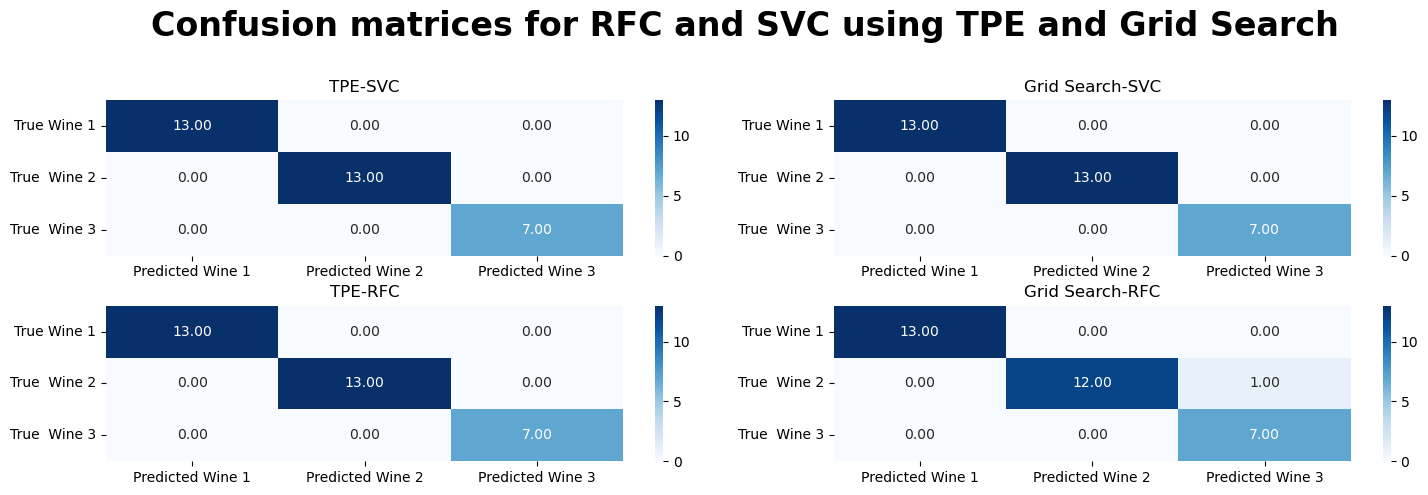

In [45]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15,5))
# extract the confusion matrix
cm = final_metrics.loc['confusion_matrix'][0]
# plot the heatmap
sns.heatmap(cm, ax=axs[0][0], annot=True, cmap='Blues', xticklabels=['Predicted Wine 1', 'Predicted Wine 2','Predicted Wine 3' ], yticklabels=['True Wine 1', 'True  Wine 2','True  Wine 3' ],fmt='.2f')
cm = final_metrics.loc['confusion_matrix'][1]
# plot the heatmap
sns.heatmap(cm, ax=axs[0][1], annot=True, cmap='Blues', xticklabels=['Predicted Wine 1', 'Predicted Wine 2','Predicted Wine 3' ], yticklabels=['True Wine 1', 'True  Wine 2','True  Wine 3' ],fmt='.2f')
cm = final_metrics.loc['confusion_matrix'][2]
# plot the heatmap
sns.heatmap(cm, ax=axs[1][0], annot=True, cmap='Blues', xticklabels=['Predicted Wine 1', 'Predicted Wine 2','Predicted Wine 3' ], yticklabels=['True Wine 1', 'True  Wine 2','True  Wine 3' ],fmt='.2f')
cm = final_metrics.loc['confusion_matrix'][3]
# plot the heatmap
sns.heatmap(cm, ax=axs[1][1], annot=True, cmap='Blues', xticklabels=['Predicted Wine 1', 'Predicted Wine 2','Predicted Wine 3' ], yticklabels=['True Wine 1', 'True  Wine 2','True  Wine 3' ],fmt='.2f')
axs[0][0].set_title('TPE-SVC')
axs[0][1].set_title('Grid Search-SVC')
axs[1][0].set_title('TPE-RFC')
axs[1][1].set_title('Grid Search-RFC')
fig.tight_layout()
plt.subplots_adjust(top=0.8)
fig.suptitle(f'Confusion matrices for RFC and SVC using TPE and Grid Search', fontsize = 24, fontweight = "bold");
plt.show()

<div class="alert alert-success h1" role="alert">
    <b> Conclusions
</b>
<a class="anchor" id="conclusions"></a> </div>

In this work we have explored the dataset, determining that the target data, the wine class, is a multiclass classification problem. Next, we have determined which model performs better with the defaut values, usinc different metrics such as the accuracy, or the f1_score. From this study, we decide to choose the Random Forest Classification (RFC) and the Support Vector Classiciation (SVC). By using the TPE and GridSearch approach, we have found the best parameters for both algorithms, displaying both of them similar metrics and cross validation score. In any case, both thee RFC and the SVC classification methods displays a perfect confusion matrix is fully able to classify the different wine classes. 